<a href="https://colab.research.google.com/github/moiyajosephs/Thesis/blob/main/Math_Data_Exploration_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import tensorflow as tf
from scipy.stats import ttest_ind
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

There are 32 districts total in this data set.

In [ ]:
df=pd.read_excel("math.xlsx",sheet_name="All")
df

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,1,3,2023,All Students,575,454.118256,113,19.652174,160,27.826086,146,25.391304,156,27.130434,302,52.521740
1,1,4,2023,All Students,537,454.886414,145,27.001862,94,17.504656,160,29.795158,138,25.698324,298,55.493481
2,1,5,2023,All Students,559,456.059021,180,32.200359,89,15.921288,110,19.677996,180,32.200359,290,51.878353
3,1,6,2023,All Students,558,460.560944,127,22.759857,108,19.354839,153,27.419355,170,30.465950,323,57.885303
4,1,7,2023,All Students,586,459.976105,107,18.259386,127,21.672356,156,26.621161,196,33.447098,352,60.068260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,32,5,2013,All Students,1202,288.913483,649,53.993343,369,30.698835,155,12.895175,29,2.412646,184,15.307820
2012,32,6,2013,All Students,1345,285.690704,569,42.304832,593,44.089218,141,10.483272,42,3.122677,183,13.605947
2013,32,7,2013,All Students,1322,285.103638,735,55.597580,424,32.072617,136,10.287443,27,2.042360,163,12.329803
2014,32,8,2013,All Students,1304,284.267639,650,49.846626,456,34.969326,151,11.579755,47,3.604295,198,15.184049


# Data Analysis Methids

## Preprocessing steps
Narrowing to the years of interest for the purpose of this study.

In [ ]:
years_of_interest = [2018,2019,2022,2023]

In [ ]:
pre_pandemic = [year for year in years_of_interest if year <= 2020]
df_filtered = df[df['Year'].isin(pre_pandemic)]
df_filtered.head()

grouped_by_grade1 = df_filtered.groupby(["Year","Grade"])["Number Tested"].sum()
grouped_by_grade1

Year  Grade     
2018  3              68675
      4              68843
      5              69372
      6              65979
      7              65713
      8              49725
      All Grades    388307
2019  3              66091
      4              68046
      5              67387
      6              66908
      7              65437
      8              49366
      All Grades    383235
Name: Number Tested, dtype: int64

In [ ]:
post_pandemic = [year for year in years_of_interest if year >= 2020]
df_filtered = df[df['Year'].isin(post_pandemic)]
df_filtered.head()

grouped_by_grade = df_filtered.groupby(["Year","Grade"])["Number Tested"].sum()
grouped_by_grade

Year  Grade     
2022  3              52450
      4              54356
      5              54664
      6              53323
      7              54853
      8              33810
      All Grades    303456
2023  3              51866
      4              53195
      5              55137
      6              53519
      7              54141
      8              33692
      All Grades    301550
Name: Number Tested, dtype: int64

# Deep Dive into the Data

Here I look at the years of interest to get an understanding of the shape of the dataa.

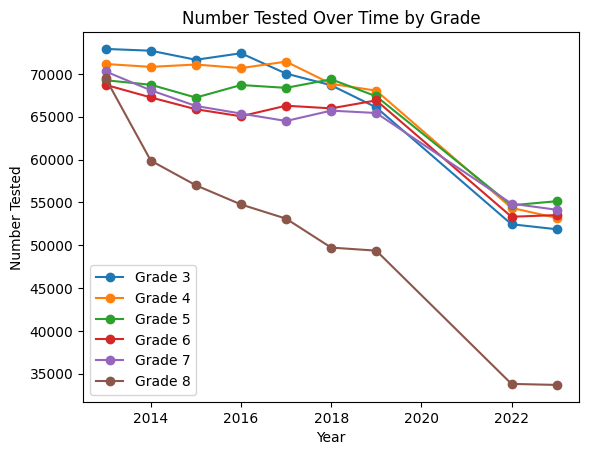

In [ ]:
#Filter out All Grades to get a more granular analysis
df = df[df["Grade"]!="All Grades"]
year_comparison = df.groupby(["Year","Grade"])["Number Tested"].sum().reset_index()


for grade in year_comparison["Grade"].unique():
  subset = year_comparison[year_comparison["Grade"] == grade]
  plt.plot(subset["Year"], subset["Number Tested"], marker = "o", label = f"Grade {grade}")

plt.xlabel("Year")
plt.ylabel("Number Tested")
plt.title("Number Tested Over Time by Grade")
plt.legend()
plt.show()


Analyzed the amount of scholars tested over the time of the data set;
- Finding: over time the number of student tested has decreased.
- the number of students in 8th grade at the lowest


% of student by level per district

In [ ]:
# Filter data for the selected years
selected_years = [2023, 2022, 2019, 2018]
df_selected_years = df[df["Year"].isin(selected_years)]

level_columns = ["# Level 1", "# Level 2","# Level 3","# Level 4" ]


### The best performing district in each year.



In [ ]:
df_selected_years.head()

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,1,3,2023,All Students,575,454.118256,113,19.652174,160,27.826086,146,25.391304,156,27.130434,302,52.521740
1,1,4,2023,All Students,537,454.886414,145,27.001862,94,17.504656,160,29.795158,138,25.698324,298,55.493481
2,1,5,2023,All Students,559,456.059021,180,32.200359,89,15.921288,110,19.677996,180,32.200359,290,51.878353
3,1,6,2023,All Students,558,460.560944,127,22.759857,108,19.354839,153,27.419355,170,30.465950,323,57.885303
4,1,7,2023,All Students,586,459.976105,107,18.259386,127,21.672356,156,26.621161,196,33.447098,352,60.068260


In [ ]:
df_filtered = df_selected_years[["District","Grade","Year","% Level 3+4","Number Tested","Mean Scale Score"]]

In [ ]:
df_filtered

,District,Grade,Year,% Level 3+4,Number Tested,Mean Scale Score
0,1,3,2023,52.521740,575,454.118256
1,1,4,2023,55.493481,537,454.886414
2,1,5,2023,51.878353,559,456.059021
3,1,6,2023,57.885303,558,460.560944
4,1,7,2023,60.068260,586,459.976105
...,...,...,...,...,...,...
1975,32,4,2018,30.303030,825,593.272705
1976,32,5,2018,28.443449,893,591.979858
1977,32,6,2018,29.690722,970,593.004150
1978,32,7,2018,26.845638,1043,592.701843


# Average % profcient score before and after pandemic

In [ ]:
before_2020 = df_filtered[df_filtered["Year"] < 2020]["% Level 3+4"].mean()
after_2020 = df_filtered[df_filtered["Year"] >= 2020]["% Level 3+4"].mean()

In [ ]:
before_2020, after_2020

(np.float64(40.733782115), np.float64(40.286264289145834))

In [ ]:
before_2020 = df_filtered[df_filtered["Year"] < 2020]["Mean Scale Score"].mean()
after_2020 = df_filtered[df_filtered["Year"] >= 2020]["Mean Scale Score"].mean()

In [ ]:
before_2020, after_2020

(np.float64(598.38429911875), np.float64(521.8256827208334))

In [ ]:
before_2020_tested = df_filtered[df_filtered["Year"] < 2020]["Number Tested"].sum()
after_2020_tested = df_filtered[df_filtered["Year"] >= 2020]["Number Tested"].sum()

before_2020_tested, after_2020_tested

(np.int64(771542), np.int64(605006))

### Number tested by district

In [ ]:
tested_by_district = df_filtered.groupby(["District", "Year"])["Number Tested"].sum().reset_index()

tested_by_district["Period"] = tested_by_district["Year"].apply(lambda x: "Before 2020" if x < 2020 else "2020 and After")

district_summary = tested_by_district.groupby(["District", "Period"])["Number Tested"].sum().reset_index()

district_comparison = district_summary.pivot(index="District", columns="Period", values="Number Tested").fillna(0).reset_index()

In [ ]:
district_comparison

Period,District,2020 and After,Before 2020
0,1,6025,8176
1,2,22238,29156
2,3,10877,14278
3,4,7494,9938
4,5,6139,9189
5,6,12092,18448
6,7,10719,14199
7,8,20338,25417
8,9,21965,30679
9,10,35074,45788


### % proficient per district before and after the pandemic

In [ ]:
performance_by_district = df_filtered.groupby(["District", "Year"])["% Level 3+4"].mean().reset_index()
performance_by_district["Period"] = performance_by_district["Year"].apply(lambda x: "Before 2020" if x < 2020 else "2020 and After")

performance_summary = performance_by_district.groupby(["District", "Period"])["% Level 3+4"].mean().reset_index()

performance_comparison = performance_summary.pivot(index="District", columns="Period", values="% Level 3+4").fillna(0).reset_index()
performance_comparison["Change"] = performance_comparison["2020 and After"] - performance_comparison["Before 2020"]

# Sort by largest positive change
top_contributors = performance_comparison.sort_values(by="Change", ascending=False)
top_contributors

Period,District,2020 and After,Before 2020,Change
17,18,37.510754,32.089619,5.421135
22,23,25.597204,21.900248,3.696956
15,16,31.708737,28.311794,3.396944
18,19,29.354860,26.123400,3.231460
28,29,34.295826,31.514309,2.781518
30,31,49.415974,47.659288,1.756686
10,11,32.714883,31.046009,1.668874
11,12,22.040437,20.397228,1.643209
13,14,38.508059,37.371750,1.136310
12,13,38.761287,37.710780,1.050508


In [ ]:
performance_by_district = df_filtered.groupby(["District", "Year"])["Mean Scale Score"].mean().reset_index()
performance_by_district["Period"] = performance_by_district["Year"].apply(lambda x: "Before 2020" if x < 2020 else "2020 and After")

performance_summary = performance_by_district.groupby(["District", "Period"])["Mean Scale Score"].mean().reset_index()

performance_comparison = performance_summary.pivot(index="District", columns="Period", values="Mean Scale Score").fillna(0).reset_index()

performance_comparison["Change"] = performance_comparison["2020 and After"] - performance_comparison["Before 2020"]

top_contributors = performance_comparison.sort_values(by="Change", ascending=False)
top_contributors

Period,District,2020 and After,Before 2020,Change
25,26,541.005295,614.503876,-73.498581
19,20,535.592211,609.487727,-73.895515
0,1,528.168190,602.175100,-74.006910
17,18,520.506851,594.743632,-74.236781
1,2,538.981392,613.282110,-74.300718
30,31,526.971464,601.393377,-74.421913
15,16,516.361537,591.873484,-75.511948
2,3,529.823987,605.518509,-75.694522
27,28,526.269058,602.012665,-75.743607
28,29,518.687899,594.450134,-75.762235


# number of each ethnicity per district and in total and in grade pre and post pandemic

# % proficient by grade overall the districts.

In [ ]:
grade_year_performance = df_filtered.groupby(["Grade", "Year"])["% Level 3+4"].mean().reset_index()
grade_year_performance

,Grade,Year,% Level 3+4
0,3,2018,50.523025
1,3,2019,51.500024
2,3,2022,46.010542
3,3,2023,52.724284
4,4,2018,43.859224
5,4,2019,46.918843
6,4,2022,38.572158
7,4,2023,49.677272
8,5,2018,39.355048
9,5,2019,43.393494


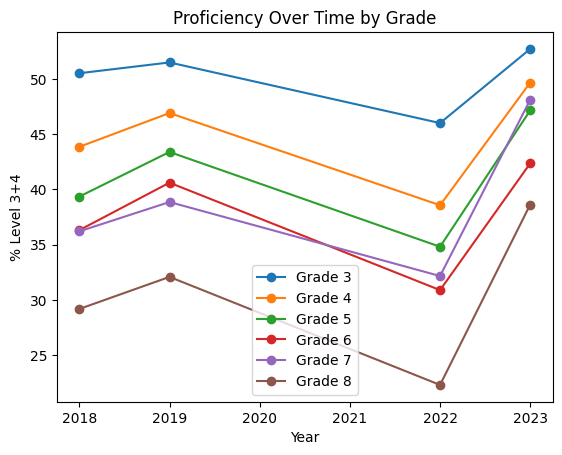

In [ ]:
for grade in grade_year_performance["Grade"].unique():
  subset = grade_year_performance[grade_year_performance["Grade"] == grade]
  plt.plot(subset["Year"], subset["% Level 3+4"], marker = "o", label = f"Grade {grade}")

plt.xlabel("Year")
plt.ylabel("% Level 3+4")
plt.title("Proficiency Over Time by Grade")
plt.legend()
plt.show()

In [ ]:
grade_year_performance = df_filtered.groupby(["Grade", "Year"])["Mean Scale Score"].mean().reset_index()
grade_year_performance

,Grade,Year,Mean Scale Score
0,3,2018,598.629848
1,3,2019,599.181007
2,3,2022,595.613388
3,3,2023,452.516062
4,4,2018,598.302738
5,4,2019,599.317644
6,4,2022,593.323071
7,4,2023,450.789161
8,5,2018,597.886942
9,5,2019,598.951677


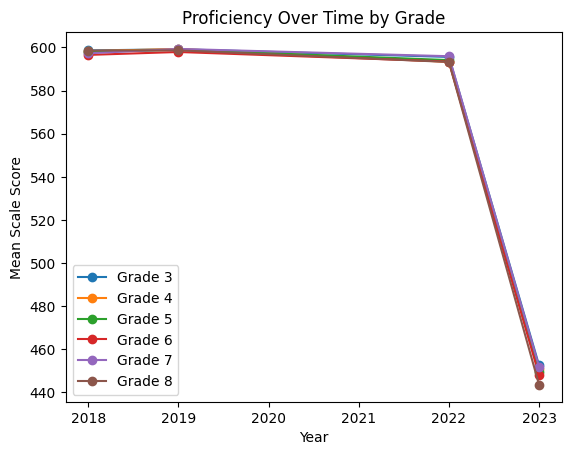

In [ ]:
for grade in grade_year_performance["Grade"].unique():
  subset = grade_year_performance[grade_year_performance["Grade"] == grade]
  plt.plot(subset["Year"], subset["Mean Scale Score"], marker = "o", label = f"Grade {grade}")

plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.title("Proficiency Over Time by Grade")
plt.legend()
plt.show()

In [ ]:
# find the best district by grade and year

best_group_by_year = df_filtered.loc[
    df_filtered.groupby(["Grade","Year"])["% Level 3+4"].idxmax()
]

best_group_by_year

,District,Grade,Year,% Level 3+4,Number Tested,Mean Scale Score
1596,26,3,2018,81.925674,1776,613.503357
77,2,3,2019,81.355934,2655,613.477966
1582,26,3,2022,78.387100,1550,611.116760
1575,26,3,2023,80.977898,1493,471.189545
1597,26,4,2018,77.969879,1793,614.767456
1590,26,4,2019,79.342987,1796,615.661499
71,2,4,2022,74.350937,2234,611.542541
64,2,4,2023,80.056313,2131,472.404968
86,2,5,2018,75.709663,2783,615.058228
1591,26,5,2019,76.066994,1851,614.911377


In [ ]:
best_group_by_year["District"].unique()

array([26,  2, 20])

In [ ]:
# find the best district by grade and year

best_group_by_year = df_filtered.loc[
    df_filtered.groupby(["Grade","Year"])["Mean Scale Score"].idxmax()
]

best_group_by_year

,District,Grade,Year,% Level 3+4,Number Tested,Mean Scale Score
1596,26,3,2018,81.925674,1776,613.503357
77,2,3,2019,81.355934,2655,613.477966
1582,26,3,2022,78.387100,1550,611.116760
1575,26,3,2023,80.977898,1493,471.189545
1597,26,4,2018,77.969879,1793,614.767456
1590,26,4,2019,79.342987,1796,615.661499
71,2,4,2022,74.350937,2234,611.542541
64,2,4,2023,80.056313,2131,472.404968
86,2,5,2018,75.709663,2783,615.058228
1591,26,5,2019,76.066994,1851,614.911377


In [ ]:
best_group_by_year["District"].unique()

array([26,  2, 21, 20])

In [ ]:
math_ethnicity_df=pd.read_excel("math.xlsx",sheet_name="Ethnicity")
math_ethnicity_df

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,1,3,2023,Asian,124,479.903229,3,2.419355,13,10.483871,30,24.193548,78,62.903225,108,87.096771
1,1,3,2023,Black,80,434.450012,32,40,27,33.75,13,16.25,8,10,21,26.25
2,1,3,2023,Hispanic,235,437.017029,70,29.787233,96,40.851063,62,26.382978,7,2.978723,69,29.361702
3,1,3,2023,Multi-Racial,34,s,s,s,s,s,s,s,s,s,s,s
4,1,3,2023,Native American,4,s,s,s,s,s,s,s,s,s,s,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12000,32,All Grades,2013,Black,1718,286.915588,818,47.613503,626,36.437717,219,12.74738,55,3.201397,274,15.948777
12001,32,All Grades,2013,Hispanic,5559,284.790619,2750,49.46933,2023,36.391438,639,11.494873,147,2.644361,786,14.139234
12002,32,All Grades,2013,Multi-Racial,3,s,s,s,s,s,s,s,s,s,s,s
12003,32,All Grades,2013,Native American,40,s,s,s,s,s,s,s,s,s,s,s


### Ethinicity deep dive into District 26

In [ ]:
math_ethnicity_26 = math_ethnicity_df[math_ethnicity_df["District"]==26]

In [ ]:
math_ethnicity_26[math_ethnicity_26["Year"].isin([2018,2019,2020,2021,2022]) & math_ethnicity_26["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4"]]

,Year,Grade,Category,Number Tested,% Level 3+4
9449,2022,All Grades,Asian,5554,80.410515
9450,2022,All Grades,Black,414,38.164249
9451,2022,All Grades,Hispanic,1205,45.311203
9452,2022,All Grades,Multi-Racial,175,74.285713
9453,2022,All Grades,Native American,82,51.219513
9454,2022,All Grades,White,1198,56.761269
9491,2019,All Grades,Asian,6418,84.574631
9492,2019,All Grades,Black,546,52.014652
9493,2019,All Grades,Hispanic,1430,52.727272
9494,2019,All Grades,Multi-Racial,193,76.683937


In [ ]:
math_ethnicity_2 = math_ethnicity_df[math_ethnicity_df["District"]==2]

In [ ]:
math_ethnicity_2[math_ethnicity_2["Year"].isin([2018,2019,2020,2021,2022]) & math_ethnicity_2["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4"]]

,Year,Grade,Category,Number Tested,% Level 3+4
456,2022,All Grades,Asian,3237,82.576462
457,2022,All Grades,Black,767,21.642763
458,2022,All Grades,Hispanic,1896,40.031647
459,2022,All Grades,Multi-Racial,760,s
460,2022,All Grades,Native American,42,61.904762
461,2022,All Grades,White,4569,76.362442
498,2019,All Grades,Asian,4173,85.885452
499,2019,All Grades,Black,1063,30.761993
500,2019,All Grades,Hispanic,2411,47.905434
501,2019,All Grades,Multi-Racial,747,86.077644


In [ ]:
math_ethnicity_20 = math_ethnicity_df[math_ethnicity_df["District"]==20]

In [ ]:
math_ethnicity_20[math_ethnicity_20["Year"].isin([2018,2019,2020,2021,2022]) & math_ethnicity_20["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4","Mean Scale Score"]]

,Year,Grade,Category,Number Tested,% Level 3+4,Mean Scale Score
7188,2022,All Grades,Asian,10084,74.266167,614.322266
7189,2022,All Grades,Black,325,34.153847,594.910767
7190,2022,All Grades,Hispanic,5328,28.246998,592.067566
7191,2022,All Grades,Multi-Racial,141,65.957443,611.815613
7192,2022,All Grades,Native American,90,47.777779,601.455566
7193,2022,All Grades,White,4165,54.669868,604.223999
7230,2019,All Grades,Asian,11332,79.509354,617.670837
7231,2019,All Grades,Black,427,41.920376,600.793884
7232,2019,All Grades,Hispanic,5931,37.835102,597.287964
7233,2019,All Grades,Multi-Racial,137,69.343063,610.817505


In [ ]:
# find the worst district by grade and year

worst_group_by_year = df_filtered.loc[
    df_filtered.groupby(["Grade","Year"])["% Level 3+4"].idxmin()
]

worst_group_by_year

,District,Grade,Year,% Level 3+4,Number Tested,Mean Scale Score
714,12,3,2018,26.472178,1851,587.305237
1400,23,3,2019,27.681160,690,588.423218
385,7,3,2022,23.738533,872,584.795898
1953,32,3,2023,33.276741,589,441.730042
715,12,4,2018,21.294809,1869,587.190491
1401,23,4,2019,23.809525,714,587.882324
701,12,4,2022,14.658926,1378,580.756165
694,12,4,2023,29.160187,1286,436.475128
716,12,5,2018,15.339074,1858,584.946716
1402,23,5,2019,21.991085,673,587.745911


In [ ]:
# find the worst district by grade and year

worst_group_by_year_mss = df_filtered.loc[
    df_filtered.groupby(["Grade","Year"])["Mean Scale Score"].idxmin()
]

worst_group_by_year_mss

,District,Grade,Year,% Level 3+4,Number Tested,Mean Scale Score
714,12,3,2018,26.472178,1851,587.305237
1400,23,3,2019,27.681160,690,588.423218
385,7,3,2022,23.738533,872,584.795898
504,9,3,2023,33.707203,1694,440.295746
715,12,4,2018,21.294809,1869,587.190491
1401,23,4,2019,23.809525,714,587.882324
701,12,4,2022,14.658926,1378,580.756165
694,12,4,2023,29.160187,1286,436.475128
716,12,5,2018,15.339074,1858,584.946716
1402,23,5,2019,21.991085,673,587.745911


In [ ]:
worst_group_by_year_mss["District"].unique()

array([12, 23,  7,  9,  5])

In [ ]:
worst_group_by_year_12 = worst_group_by_year_mss[worst_group_by_year_mss["District"]==12]

In [ ]:
worst_group_by_year_12["% Level 3+4"].mean()

np.float64(18.799163818916664)

In [ ]:
worst_group_by_year_12["Mean Scale Score"].mean()

np.float64(548.1263427833334)

In [ ]:
worst_group_by_year_12 = math_ethnicity_df[math_ethnicity_df["District"]==12]

In [ ]:
worst_group_by_year_12

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
4131,12,3,2023,Asian,57,450.736847,8,14.035088,20,35.087719,20,35.087719,9,15.789474,29,50.877193
4132,12,3,2023,Black,295,440.691528,96,32.542374,90,30.508474,87,29.491526,22,7.457627,109,36.949154
4133,12,3,2023,Hispanic,910,440.924164,254,27.912088,337,37.032967,247,27.142857,72,7.912088,319,35.054947
4134,12,3,2023,Multi-Racial,5,s,s,s,s,s,s,s,s,s,s,s
4135,12,3,2023,Native American,10,s,s,s,s,s,s,s,s,s,s,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496,12,All Grades,2013,Black,2980,278.52417,1776,59.597317,920,30.872482,227,7.61745,57,1.912752,284,9.530201
4497,12,All Grades,2013,Hispanic,7457,279.849396,4203,56.363148,2435,32.653881,669,8.971437,150,2.011533,819,10.982969
4498,12,All Grades,2013,Multi-Racial,6,259.166656,5,83.333336,1,16.666666,0,0,0,0,0,0
4499,12,All Grades,2013,Native American,78,299.705139,29,37.179485,24,30.76923,17,21.794872,8,10.256411,25,32.051281


In [ ]:
worst_group_by_year_12[worst_group_by_year_12["Year"].isin([2018,2019,2020,2021,2022]) & worst_group_by_year_12["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4","Mean Scale Score"]]

,Year,Grade,Category,Number Tested,% Level 3+4,Mean Scale Score
4209,2022,All Grades,Asian,235,33.19149,594.514893
4210,2022,All Grades,Black,1820,14.065934,582.9599
4211,2022,All Grades,Hispanic,5382,14.418432,584.214966
4212,2022,All Grades,Multi-Racial,33,24.242424,586.606079
4213,2022,All Grades,Native American,87,22.988506,587.83905
4214,2022,All Grades,White,127,s,s
4251,2019,All Grades,Asian,296,47.297298,599.239868
4252,2019,All Grades,Black,2405,19.833679,587.549255
4253,2019,All Grades,Hispanic,6988,22.967945,589.269348
4254,2019,All Grades,Multi-Racial,30,23.333334,594.799988


In [ ]:
worst_group_by_year_23 = worst_group_by_year_mss[worst_group_by_year_mss["District"]==23]

Economic disadvantage
comparing the difference in proficiencies when focusing on economic grousp in these districts identified as the overall best and the overall worst.

In [ ]:
math_econ_df=pd.read_excel("math.xlsx",sheet_name="Econ Status")

In [ ]:
math_econ_12 = math_econ_df[math_econ_df["District"]==12]


In [ ]:
math_econ_12[math_econ_12["Year"].isin([2018,2019,2020,2021,2022]) & math_econ_12["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4","Mean Scale Score"]]

,Year,Grade,Category,Number Tested,% Level 3+4,Mean Scale Score
1412,2022,All Grades,Econ Disadv,7191,14.712835,584.145019
1413,2022,All Grades,Not Econ Disadv,494,20.647774,586.425110
1426,2019,All Grades,Econ Disadv,9188,22.725294,588.991516
1427,2019,All Grades,Not Econ Disadv,796,26.758795,591.562805
1440,2018,All Grades,Econ Disadv,9616,17.741264,586.642883
1441,2018,All Grades,Not Econ Disadv,731,23.529411,590.350220


In [ ]:
math_econ_26 = math_econ_df[math_econ_df["District"]==26]
math_econ_2 = math_econ_df[math_econ_df["District"]==2]
math_econ_20 = math_econ_df[math_econ_df["District"]==20]

In [ ]:
math_econ_26[math_econ_26["Year"].isin([2018,2019,2020,2021,2022]) & math_econ_26["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4"]]

,Year,Grade,Category,Number Tested,% Level 3+4
3176,2022,All Grades,Econ Disadv,4604,64.769768
3177,2022,All Grades,Not Econ Disadv,4024,75.546722
3190,2019,All Grades,Econ Disadv,5465,71.088745
3191,2019,All Grades,Not Econ Disadv,4906,79.759476
3204,2018,All Grades,Econ Disadv,5705,69.623138
3205,2018,All Grades,Not Econ Disadv,4663,80.055756


In [ ]:
math_econ_2[math_econ_2["Year"].isin([2018,2019,2020,2021,2022]) & math_econ_2["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4"]]

,Year,Grade,Category,Number Tested,% Level 3+4
152,2022,All Grades,Econ Disadv,3924,49.949032
153,2022,All Grades,Not Econ Disadv,7347,78.508232
166,2019,All Grades,Econ Disadv,5279,60.219738
167,2019,All Grades,Not Econ Disadv,9131,82.904388
180,2018,All Grades,Econ Disadv,5525,58.063347
181,2018,All Grades,Not Econ Disadv,9221,83.049561


In [ ]:
math_econ_20[math_econ_20["Year"].isin([2018,2019,2020,2021,2022]) & math_econ_20["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4"]]

,Year,Grade,Category,Number Tested,% Level 3+4
2420,2022,All Grades,Econ Disadv,15947,54.687401
2421,2022,All Grades,Not Econ Disadv,4186,66.817963
2434,2019,All Grades,Econ Disadv,18628,61.063992
2435,2019,All Grades,Not Econ Disadv,4904,76.366234
2448,2018,All Grades,Econ Disadv,18957,58.616871
2449,2018,All Grades,Not Econ Disadv,4703,73.931534


students with disabilities

In [ ]:
math_swd_df=pd.read_excel("math.xlsx",sheet_name="SWD")

In [ ]:
math_swd_26 = math_swd_df[math_econ_df["District"]==26]
math_swd_2 = math_swd_df[math_econ_df["District"]==2]
math_swd_20 = math_swd_df[math_econ_df["District"]==20]

In [ ]:
math_swd_26[math_swd_26["Year"].isin([2018,2019,2020,2021,2022]) & math_swd_26["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4","Mean Scale Score"]]

,Year,Grade,Category,Number Tested,% Level 3+4,Mean Scale Score
3176,2022,All Grades,Not SWD,7358,76.134819,614.893738
3177,2022,All Grades,SWD,1270,33.070866,593.201599
3190,2019,All Grades,Not SWD,8869,81.666481,617.781128
3191,2019,All Grades,SWD,1502,36.950733,595.972046
3204,2018,All Grades,Not SWD,8872,80.894951,617.708740
3205,2018,All Grades,SWD,1496,35.294117,595.643738


In [ ]:
math_swd_2[math_swd_2["Year"].isin([2018,2019,2020,2021,2022]) & math_swd_2["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4","Mean Scale Score"]]

,Year,Grade,Category,Number Tested,% Level 3+4,Mean Scale Score
152,2022,All Grades,Not SWD,9137,76.151909,613.752991
153,2022,All Grades,SWD,2134,36.082474,593.241821
166,2019,All Grades,Not SWD,11590,82.985329,617.846313
167,2019,All Grades,SWD,2820,40.106384,596.679810
180,2018,All Grades,Not SWD,11885,81.960457,617.326660
181,2018,All Grades,SWD,2861,39.321915,596.497375


In [ ]:
math_swd_20[math_swd_20["Year"].isin([2018,2019,2020,2021,2022]) & math_swd_20["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4","Mean Scale Score"]]

,Year,Grade,Category,Number Tested,% Level 3+4,Mean Scale Score
2420,2022,All Grades,Not SWD,16824,63.962196,609.495728
2421,2022,All Grades,SWD,3309,22.877003,587.954651
2434,2019,All Grades,Not SWD,19910,71.089905,613.319763
2435,2019,All Grades,SWD,3622,26.670347,590.879334
2448,2018,All Grades,Not SWD,20093,68.516396,612.388855
2449,2018,All Grades,SWD,3567,23.044575,589.888672


provide summary on all the districts here


In [ ]:
math_swd_12 = math_swd_df[math_econ_df["District"]==12]

In [ ]:
math_swd_12[math_swd_12["Year"].isin([2018,2019,2020,2021,2022]) & math_swd_12["Grade"].isin(["All Grades"])][["Year","Grade", "Category","Number Tested","% Level 3+4","Mean Scale Score"]]

,Year,Grade,Category,Number Tested,% Level 3+4,Mean Scale Score
1412,2022,All Grades,Not SWD,5547,19.127457,587.932739
1413,2022,All Grades,SWD,2138,4.630496,574.844727
1426,2019,All Grades,Not SWD,7249,28.528072,592.877197
1427,2019,All Grades,SWD,2735,8.519196,579.440979
1440,2018,All Grades,Not SWD,7568,22.132664,590.173523
1441,2018,All Grades,SWD,2779,7.304786,578.003235


Do they same for ela here

Time series should be before covid; then comare to what it actually was with covid

code to see if there is a statistical difference between ethnicities.

# Statistical Differences


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
df_ethnicity_comparison = math_ethnicity_df[
     (math_ethnicity_df["Grade"] == "All Grades")
].copy()

df_ethnicity_comparison["% Level 3+4"] = pd.to_numeric(df_ethnicity_comparison["% Level 3+4"], errors="coerce")

results = []

for district in df_ethnicity_comparison["District"].unique():
  for ethnicity in df_ethnicity_comparison["Category"].unique():
    df_group = df_ethnicity_comparison[
        (df_ethnicity_comparison["District"] == district) &
        (df_ethnicity_comparison["Category"] == ethnicity)
    ]
    pre = df_group[df_group["Year"].isin([2018, 2019])]["% Level 3+4"].dropna()
    post = df_group[df_group["Year"].isin([2022, 2023])]["% Level 3+4"].dropna()
    if len(pre) > 1 and len(post) > 1:
      t_stat, p_val = ttest_ind(post, pre, equal_var=False)
      results.append({
          "District": district,
          "Ethnicity": ethnicity,
          "Pre Avg": pre.mean(),
          "Post Avg": post.mean(),
          "Change": post.mean() - pre.mean(),
          "p-value": p_val})


results_df = pd.DataFrame(results)
results_df

,District,Ethnicity,Pre Avg,Post Avg,Change,p-value
0,1,Asian,82.256054,84.317245,2.061192,0.756770
1,1,Black,21.514086,22.201640,0.687554,0.941187
2,1,Hispanic,30.660934,28.264953,-2.395982,0.731872
3,1,White,77.255051,76.464092,-0.790958,0.900010
4,2,Asian,85.237167,86.159187,0.922020,0.840102
...,...,...,...,...,...,...
140,31,White,59.337379,61.627596,2.290216,0.808818
141,32,Black,29.447081,32.382568,2.935488,0.818940
142,32,Hispanic,29.860046,23.999075,-5.860971,0.487172
143,32,Multi-Racial,54.166666,37.857143,-16.309523,0.411773


In [ ]:
results_df[results_df["p-value"] < 0.05]

,District,Ethnicity,Pre Avg,Post Avg,Change,p-value


In [ ]:
df_ethnicity_comparison = math_ethnicity_df[
     (math_ethnicity_df["Grade"] == "All Grades")
].copy()

df_ethnicity_comparison['Mean Scale Score'] = pd.to_numeric(df_ethnicity_comparison['Mean Scale Score'], errors='coerce')

results = []

for district in df_ethnicity_comparison["District"].unique():
  for ethnicity in df_ethnicity_comparison["Category"].unique():
    df_group = df_ethnicity_comparison[
        (df_ethnicity_comparison["District"] == district) &
        (df_ethnicity_comparison["Category"] == ethnicity)
    ]
    pre = df_group[df_group["Year"].isin([2018, 2019])]["Mean Scale Score"].dropna()
    post = df_group[df_group["Year"].isin([2022, 2023])]["Mean Scale Score"].dropna()
    if len(pre) > 1 and len(post) > 1:
      t_stat, p_val = ttest_ind(post, pre, equal_var=False)
      results.append({
          "District": district,
          "Ethnicity": ethnicity,
          "Pre Avg": pre.mean(),
          "Post Avg": post.mean(),
          "Change": post.mean() - pre.mean(),
          "p-value": p_val})


results_df = pd.DataFrame(results)
results_df

,District,Ethnicity,Pre Avg,Post Avg,Change,p-value
0,1,Asian,619.539856,551.235352,-68.304504,0.498011
1,1,Black,587.061432,510.433624,-76.627808,0.485041
2,1,Hispanic,593.506287,514.553146,-78.953140,0.482913
3,1,White,614.050781,545.262024,-68.788757,0.503675
4,2,Asian,619.715179,548.972427,-70.742752,0.489100
...,...,...,...,...,...,...
140,31,White,606.645233,533.448257,-73.196976,0.489417
141,32,Black,593.711304,516.956619,-76.754684,0.479127
142,32,Hispanic,593.338013,512.221787,-81.116226,0.468588
143,32,Multi-Racial,603.597229,521.528564,-82.068665,0.455464


In [ ]:
results_df[results_df["p-value"] < 0.05]

,District,Ethnicity,Pre Avg,Post Avg,Change,p-value


In [ ]:
def year_group(year):
    if year in [2018, 2019, 2020]:
        return 'Pre-2020'
    elif year in [2021, 2022, 2023]:
        return 'Post-2020'
    else:
        return None


In [ ]:
math_ethnicity_stat = math_ethnicity_df.copy()

math_ethnicity_stat['Year Group'] = math_ethnicity_stat['Year'].apply(year_group)

math_ethnicity_stat = math_ethnicity_stat[math_ethnicity_stat['Year Group'].notna()]

math_ethnicity_stat[['District', 'Year', 'Year Group', 'Mean Scale Score']]

,District,Year,Year Group,Mean Scale Score
0,1,2023,Post-2020,479.903229
1,1,2023,Post-2020,434.450012
2,1,2023,Post-2020,437.017029
3,1,2023,Post-2020,s
4,1,2023,Post-2020,s
...,...,...,...,...
11800,32,2018,Pre-2020,593.119263
11801,32,2018,Pre-2020,593.383545
11802,32,2018,Pre-2020,602.444458
11803,32,2018,Pre-2020,599.032288


In [ ]:
df_all = df[df['Category'] == 'All Students'].copy()

df_all['Year Group'] = df_all['Year'].apply(year_group)

df_all = df_all[df_all['Year Group'].notna()]

df_all[['District', 'Year', 'Year Group', 'Mean Scale Score']].head()

,District,Year,Year Group,Mean Scale Score
0,1,2023,Post-2020,454.118256
1,1,2023,Post-2020,454.886414
2,1,2023,Post-2020,456.059021
3,1,2023,Post-2020,460.560944
4,1,2023,Post-2020,459.976105


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Q("Mean Scale Score") ~ C(District) + C(Q("Year Group")) + C(District):C(Q("Year Group"))', data=df_all).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(District),4.324156e+04,31.0,0.484942,9.923204e-01
"C(Q(""Year Group""))",1.125355e+06,1.0,391.236385,1.377977e-69
"C(District):C(Q(""Year Group""))",5.440002e+02,31.0,0.006101,1.000000e+00
Residual,2.024990e+06,704.0,NaN,NaN


# Ethnicity Stats comparison


## T Test

In [ ]:
df_ethnicity_filtered = math_ethnicity_df[
    (math_ethnicity_df["Grade"] == "All Grades") &
    (math_ethnicity_df["District"].isin([26, 20]))
].copy()

df_ethnicity_filtered["% Level 3+4"] = pd.to_numeric(df_ethnicity_filtered["% Level 3+4"], errors="coerce")



results = []

for district in [26, 20]:
    for ethnicity in df_ethnicity_filtered["Category"].unique():
        df_group = df_ethnicity_filtered[
            (df_ethnicity_filtered["District"] == district) &
            (df_ethnicity_filtered["Category"] == ethnicity)
        ]

        pre = df_group[df_group["Year"].isin([2018, 2019])]["% Level 3+4"].dropna()
        post = df_group[df_group["Year"].isin([2022, 2023])]["% Level 3+4"].dropna()

        if len(pre) > 1 and len(post) > 1:
            t_stat, p_val = ttest_ind(post, pre, equal_var=False)
            results.append({
                "District": district,
                "Ethnicity": ethnicity,
                "Pre Avg": pre.mean(),
                "Post Avg": post.mean(),
                "Change": post.mean() - pre.mean(),
                "p-value": p_val
            })

results_df = pd.DataFrame(results)
results_df

,District,Ethnicity,Pre Avg,Post Avg,Change,p-value
0,26,Asian,83.911205,83.702652,-0.208553,0.959931
1,26,Black,51.145958,47.873898,-3.272060,0.793157
2,26,Hispanic,52.501616,50.939243,-1.562372,0.827631
3,26,White,67.006226,63.183716,-3.822510,0.658165
4,20,Asian,78.379063,79.045429,0.666367,0.912409
5,20,Hispanic,36.521610,34.864780,-1.656830,0.844391
6,20,White,61.168789,60.761219,-0.407570,0.958045


In [ ]:
growth_proficiency_df = math_ethnicity_df[math_ethnicity_df["Grade"] == "All Grades"].copy()

growth_proficiency_df["% Level 3+4"] = pd.to_numeric(growth_proficiency_df["% Level 3+4"], errors="coerce")
growth_proficiency_df["Mean Scale Score"] = pd.to_numeric(growth_proficiency_df["Mean Scale Score"], errors="coerce")

district_metrics = growth_proficiency_df.groupby(["District", "Year"])[["% Level 3+4", "Mean Scale Score"]].mean().reset_index()

growth_results = []

for district in district_metrics["District"].unique():
    df_group = district_metrics[district_metrics["District"] == district]

    pre = df_group[df_group["Year"].isin([2018, 2019])]
    post = df_group[df_group["Year"].isin([2022, 2023])]

    if len(pre) > 1 and len(post) > 1:
        pre_proficiency = pre["% Level 3+4"].mean()
        post_proficiency = post["% Level 3+4"].mean()
        pre_growth = pre["Mean Scale Score"].mean()
        post_growth = post["Mean Scale Score"].mean()

        growth_results.append({
            "District": district,
            "Pre Proficiency": pre_proficiency,
            "Post Proficiency": post_proficiency,
            "Proficiency Change": post_proficiency - pre_proficiency,
            "Pre Growth (Scale Score)": pre_growth,
            "Post Growth (Scale Score)": post_growth,
            "Growth Change": post_growth - pre_growth
        })

growth_proficiency_comparison = pd.DataFrame(growth_results)
growth_proficiency_comparison

,District,Pre Proficiency,Post Proficiency,Proficiency Change,Pre Growth (Scale Score),Post Growth (Scale Score),Growth Change
0,1,52.900155,52.633123,-0.267031,603.636322,530.975581,-72.660741
1,2,65.167713,64.919245,-0.248468,609.619405,536.017554,-73.601851
2,3,59.743911,54.071247,-5.672664,607.957138,530.459659,-77.497479
3,4,50.087516,53.077270,2.989754,603.668841,530.491272,-73.177569
4,5,36.691696,34.885844,-1.805852,595.844498,518.331305,-77.513193
5,6,47.445786,46.054485,-1.391301,599.494354,524.370661,-75.123693
6,7,27.515250,24.162089,-3.353161,590.323387,511.350193,-78.973193
7,8,42.835581,37.282487,-5.553094,598.667643,519.803289,-78.864354
8,9,32.630457,31.995076,-0.635380,593.980128,516.196147,-77.783981
9,10,40.682150,42.153515,1.471364,597.815989,522.117015,-75.698975


In [ ]:
growth_proficiency_comparison["Growth Change"].mean()

np.float64(-76.07647744289062)

In [ ]:
growth_proficiency_comparison["Proficiency Change"].mean()

np.float64(-0.9229232314557294)

In [ ]:
growth_proficiency_comparison.loc[growth_proficiency_comparison["Proficiency Change"].idxmax()]


,19
District,20.000000
Pre Proficiency,55.491903
Post Proficiency,59.918005
Proficiency Change,4.426102
Pre Growth (Scale Score),605.773636
Post Growth (Scale Score),534.225685
Growth Change,-71.547951


In [ ]:
growth_proficiency_comparison.loc[growth_proficiency_comparison["Proficiency Change"].idxmin()]


,31
District,32.000000
Pre Proficiency,40.770027
Post Proficiency,34.455766
Proficiency Change,-6.314261
Pre Growth (Scale Score),599.395531
Post Growth (Scale Score),517.899582
Growth Change,-81.495949


In [ ]:

prof_threshold = 1.5
growth_threshold = 2

standout_districts = growth_proficiency_comparison[
    (
        (growth_proficiency_comparison["Proficiency Change"] > prof_threshold) &
        (growth_proficiency_comparison["Growth Change"] < -growth_threshold)
    ) |
    (
        (growth_proficiency_comparison["Proficiency Change"] < -prof_threshold) &
        (growth_proficiency_comparison["Growth Change"] > growth_threshold)
    )
]


In [ ]:
standout_districts

,District,Pre Proficiency,Post Proficiency,Proficiency Change,Pre Growth (Scale Score),Post Growth (Scale Score),Growth Change
3,4,50.087516,53.077270,2.989754,603.668841,530.491272,-73.177569
13,14,47.923984,51.430545,3.506561,600.649521,526.444138,-74.205383
17,18,34.637440,37.577937,2.940497,595.553050,520.571136,-74.981913
18,19,30.967067,32.656329,1.689262,593.251761,517.442482,-75.809279
19,20,55.491903,59.918005,4.426102,605.773636,534.225685,-71.547951
28,29,36.080256,37.718887,1.638632,595.895068,519.638855,-76.256213


## Anova of all the all students

In [ ]:
math_ethnicity_stat[['District', 'Year', 'Year Group', 'Mean Scale Score']].head()

,District,Year,Year Group,Mean Scale Score
0,1,2023,Post-2020,479.903229
1,1,2023,Post-2020,434.450012
2,1,2023,Post-2020,437.017029
3,1,2023,Post-2020,s
4,1,2023,Post-2020,s


In [ ]:
math_ethnicity_stat = math_ethnicity_stat[math_ethnicity_df['Mean Scale Score'] != 's']
math_ethnicity_stat['Mean Scale Score'] = pd.to_numeric(math_ethnicity_stat['Mean Scale Score'])

model = ols('Q("Mean Scale Score") ~ C(District) + C(Q("Year Group")) + C(District):C(Q("Year Group"))', data=math_ethnicity_stat).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

<ipython-input-80-b2046d90b68d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  math_ethnicity_stat = math_ethnicity_stat[math_ethnicity_df['Mean Scale Score'] != 's']
<ipython-input-80-b2046d90b68d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_ethnicity_stat['Mean Scale Score'] = pd.to_numeric(math_ethnicity_stat['Mean Scale Score'])


,sum_sq,df,F,PR(>F)
C(District),1.548152e+05,31.0,1.862048,0.002598
"C(Q(""Year Group""))",6.644707e+06,1.0,2477.505998,0.000000
"C(District):C(Q(""Year Group""))",9.013440e+03,31.0,0.108410,1.000000
Residual,1.243114e+07,4635.0,NaN,NaN


In [ ]:
math_swd_df['Year Group'] = math_swd_df['Year'].apply(year_group)

math_swd_df = math_swd_df[math_swd_df['Year Group'].notna()]

math_swd_df = math_swd_df[math_swd_df['Mean Scale Score'] != 's']
math_swd_df['Mean Scale Score'] = pd.to_numeric(math_swd_df['Mean Scale Score'])

math_swd_df[['District', 'Year', 'Year Group', 'Mean Scale Score']].head()

,District,Year,Year Group,Mean Scale Score
0,1,2023,Post-2020,459.021545
1,1,2023,Post-2020,433.621613
2,1,2023,Post-2020,459.260010
3,1,2023,Post-2020,432.264374
4,1,2023,Post-2020,462.452332


In [ ]:
model_swd = ols('Q("Mean Scale Score") ~ C(District) + C(Q("Year Group")) + C(District):C(Q("Year Group"))', data=math_swd_df).fit()
anova_table_swd = sm.stats.anova_lm(model_swd, typ=2)

anova_table_swd

,sum_sq,df,F,PR(>F)
C(District),6.596200e+04,31.0,0.745897,8.432058e-01
"C(Q(""Year Group""))",2.633402e+06,1.0,923.132308,8.031166e-163
"C(District):C(Q(""Year Group""))",8.735198e+02,31.0,0.009878,1.000000e+00
Residual,4.929432e+06,1728.0,NaN,NaN


# which ethnicity was affected most

In [ ]:
ethnicity_grouped = (
    math_ethnicity_stat.groupby(['Category', 'Year Group'])['Mean Scale Score']
    .mean()
    .unstack()
)

In [ ]:
ethnicity_grouped['Difference (Post - Pre)'] = ethnicity_grouped['Post-2020'] - ethnicity_grouped['Pre-2020']
ethnicity_grouped = ethnicity_grouped.sort_values(by='Difference (Post - Pre)')

ethnicity_grouped

Year Group,Post-2020,Pre-2020,Difference (Post - Pre)
Category,,,
Hispanic,515.991552,594.321972,-78.330420
Black,514.671929,591.957118,-77.285189
White,529.034729,604.089012,-75.054283
Native American,523.131023,597.154241,-74.023217
Multi-Racial,531.957048,605.464118,-73.507069
Asian,537.178115,609.758320,-72.580205


In [ ]:
model_ethnicity = ols('Q("Mean Scale Score") ~ C(Category) + C(Q("Year Group")) + C(Category):C(Q("Year Group"))', data=math_ethnicity_stat).fit()
anova_ethnicity = sm.stats.anova_lm(model_ethnicity, typ=2)

anova_ethnicity

,sum_sq,df,F,PR(>F)
C(Category),2.644003e+05,5.0,20.108895,6.694067e-20
"C(Q(""Year Group""))",6.661996e+06,1.0,2533.381967,0.000000e+00
"C(Category):C(Q(""Year Group""))",5.232885e+03,5.0,0.397986,8.505073e-01
Residual,1.232533e+07,4687.0,NaN,NaN


In [ ]:
grade_grouped = (
    math_ethnicity_stat.groupby(['Grade', 'Year Group'])['Mean Scale Score']
    .mean()
    .unstack()
)

grade_grouped['Difference (Post - Pre)'] = grade_grouped['Post-2020'] - grade_grouped['Pre-2020']
grade_grouped = grade_grouped.sort_values(by='Difference (Post - Pre)')

grade_grouped

Year Group,Post-2020,Pre-2020,Difference (Post - Pre)
Grade,,,
8,521.927320,600.335384,-78.408065
4,522.638398,600.362605,-77.724207
5,523.542021,600.126431,-76.584410
6,524.620993,599.502709,-74.881715
3,526.374366,600.380815,-74.006449
All Grades,526.395063,600.173497,-73.778433
7,527.987578,600.762449,-72.774871


In [ ]:
model_grade = ols('Q("Mean Scale Score") ~ C(Grade) + C(Q("Year Group")) + C(Grade):C(Q("Year Group"))', data=math_ethnicity_stat).fit()
anova_grade = sm.stats.anova_lm(model_grade, typ=2)

anova_grade

,sum_sq,df,F,PR(>F)
C(Grade),5.387451e+03,6.0,0.334262,0.919146
"C(Q(""Year Group""))",6.677127e+06,1.0,2485.672760,0.000000
"C(Grade):C(Q(""Year Group""))",4.518214e+03,6.0,0.280330,0.946472
Residual,1.258506e+07,4685.0,NaN,NaN


# Time Series Analysis

In [ ]:
# Time series analysis

all_students_math = df[df["Category"] == "All Students"]
math_district_ts = all_students_math.groupby(["District","Year"])["% Level 3+4"].mean().reset_index()
math_district_ts

,District,Year,% Level 3+4
0,1,2013,37.031347
1,1,2014,41.151406
2,1,2015,41.618639
3,1,2016,41.322848
4,1,2017,43.159823
...,...,...,...
283,32,2017,24.100550
284,32,2018,30.115259
285,32,2019,32.261492
286,32,2022,20.391858


In [ ]:
math_district_26 = math_district_ts[math_district_ts["District"] == 26].set_index("Year")

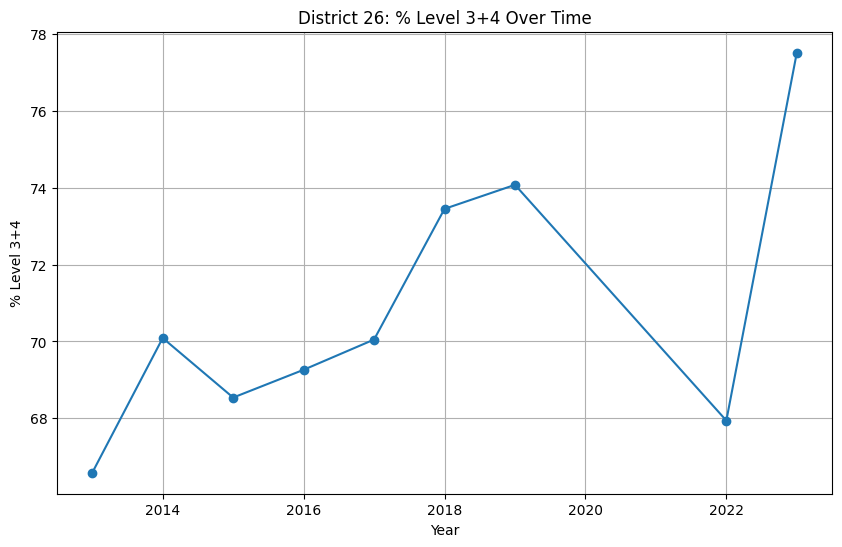

In [ ]:
math_district_26["% Level 3+4"].plot(marker='o', title="District 26: % Level 3+4 Over Time", figsize=(10, 6))
plt.ylabel("% Level 3+4")
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(math_district_26["% Level 3+4"], order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=3)
print(forecast)

9     69.908108
10    74.819543
11    71.646555
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

In [ ]:
math_ts_df=pd.read_excel("math.xlsx",sheet_name="All")
math_ts_df

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,1,3,2023,All Students,575,454.118256,113,19.652174,160,27.826086,146,25.391304,156,27.130434,302,52.521740
1,1,4,2023,All Students,537,454.886414,145,27.001862,94,17.504656,160,29.795158,138,25.698324,298,55.493481
2,1,5,2023,All Students,559,456.059021,180,32.200359,89,15.921288,110,19.677996,180,32.200359,290,51.878353
3,1,6,2023,All Students,558,460.560944,127,22.759857,108,19.354839,153,27.419355,170,30.465950,323,57.885303
4,1,7,2023,All Students,586,459.976105,107,18.259386,127,21.672356,156,26.621161,196,33.447098,352,60.068260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,32,5,2013,All Students,1202,288.913483,649,53.993343,369,30.698835,155,12.895175,29,2.412646,184,15.307820
2012,32,6,2013,All Students,1345,285.690704,569,42.304832,593,44.089218,141,10.483272,42,3.122677,183,13.605947
2013,32,7,2013,All Students,1322,285.103638,735,55.597580,424,32.072617,136,10.287443,27,2.042360,163,12.329803
2014,32,8,2013,All Students,1304,284.267639,650,49.846626,456,34.969326,151,11.579755,47,3.604295,198,15.184049


In [ ]:
math_all_ts_df = math_ts_df[(math_ts_df["Category"] == "All Students") & (math_ts_df["Grade"] == "All Grades")]
math_all_ts_df

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
6,1,All Grades,2023,All Students,3036,456.371552,753,24.802372,621,20.454546,800,26.350462,862,28.392622,1662,54.743084
13,1,All Grades,2022,All Students,2989,601.226135,975,32.619606,634,21.211107,490,16.393442,890,29.775845,1380,46.169289
20,1,All Grades,2019,All Students,3893,604.107910,1069,27.459543,780,20.035961,759,19.496532,1285,33.007961,2044,52.504494
27,1,All Grades,2018,All Students,4283,600.420715,1436,33.527901,837,19.542377,834,19.472332,1176,27.457390,2010,46.929722
34,1,All Grades,2017,All Students,4206,307.874237,1321,31.407513,1035,24.607704,776,18.449833,1074,25.534950,1850,43.984783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,32,All Grades,2017,All Students,5929,289.835724,2624,44.257042,1889,31.860348,975,16.444593,441,7.438016,1416,23.882610
1994,32,All Grades,2016,All Students,6226,288.752808,2730,43.848377,2236,35.913910,898,14.423386,362,5.814327,1260,20.237713
2001,32,All Grades,2015,All Students,6580,289.963074,2859,43.449848,2368,35.987843,984,14.954408,369,5.607903,1353,20.562309
2008,32,All Grades,2014,All Students,6942,289.969605,3000,43.215210,2541,36.603283,1036,14.923654,365,5.257851,1401,20.181503


In [ ]:
pre_math_all_ts_df = math_all_ts_df[math_all_ts_df["Year"].isin([2018, 2019])]
forecast_years = list(range(2020, 2027))

forecast_allgrades = {}

In [ ]:
for district in pre_math_all_ts_df["District"].unique():
    district_data = pre_math_all_ts_df[pre_math_all_ts_df["District"] == district].sort_values("Year")

    if len(district_data) < 2:
        continue

    model = ExponentialSmoothing(
        district_data["Mean Scale Score"], trend="add", seasonal=None, initialization_method="estimated"
    )
    fit = model.fit()
    forecast = fit.forecast(len(forecast_years))

    forecast_allgrades[district] = {
        "years": forecast_years,
        "forecast": forecast.values
    }


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the

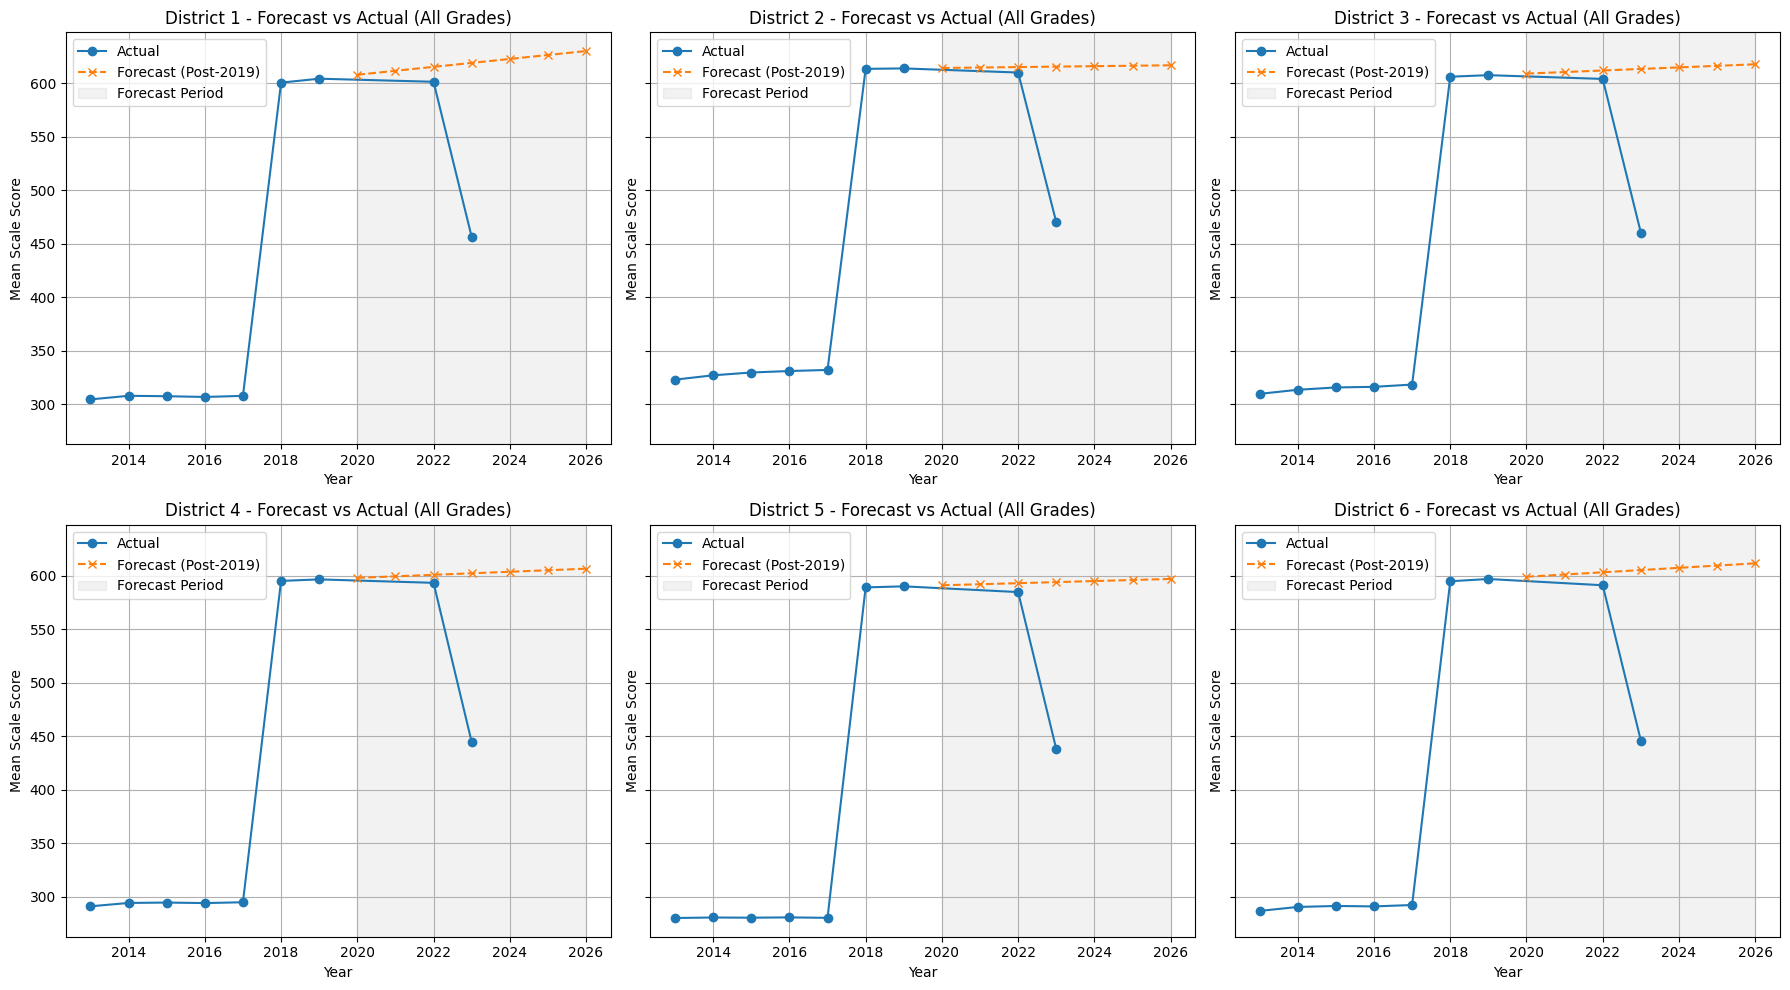

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for i, district in enumerate(sorted(forecast_allgrades.keys())[:6]):
    actual = math_all_ts_df[math_all_ts_df["District"] == district]
    forecast_data = forecast_allgrades[district]

    ax = axes[i]
    ax.plot(actual["Year"], actual["Mean Scale Score"], label="Actual", marker='o')
    ax.plot(forecast_data["years"], forecast_data["forecast"], label="Forecast (Post-2019)", linestyle="--", marker='x')
    ax.axvspan(2020, 2026, color='gray', alpha=0.1, label="Forecast Period")
    ax.set_title(f"District {district} - Forecast vs Actual (All Grades)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Mean Scale Score")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


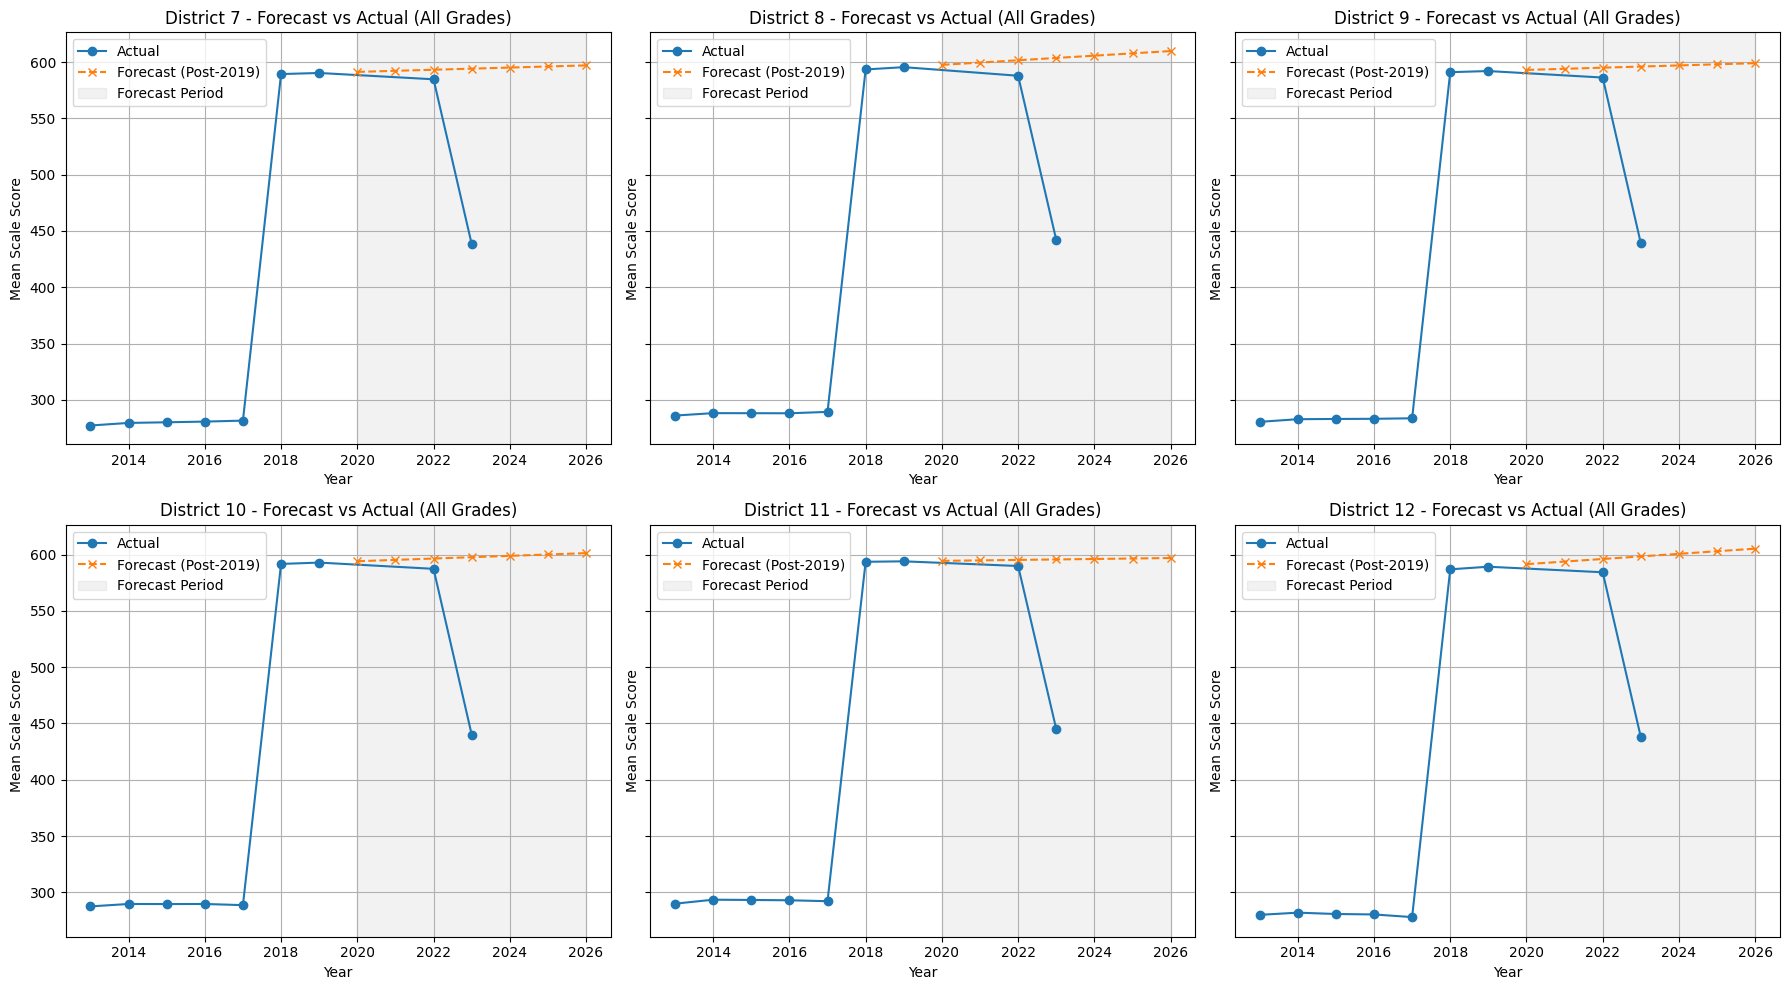

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for i, district in enumerate(sorted(forecast_allgrades.keys())[6:12]):
    actual = math_all_ts_df[math_all_ts_df["District"] == district]
    forecast_data = forecast_allgrades[district]

    ax = axes[i]
    ax.plot(actual["Year"], actual["Mean Scale Score"], label="Actual", marker='o')
    ax.plot(forecast_data["years"], forecast_data["forecast"], label="Forecast (Post-2019)", linestyle="--", marker='x')
    ax.axvspan(2020, 2026, color='gray', alpha=0.1, label="Forecast Period")
    ax.set_title(f"District {district} - Forecast vs Actual (All Grades)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Mean Scale Score")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

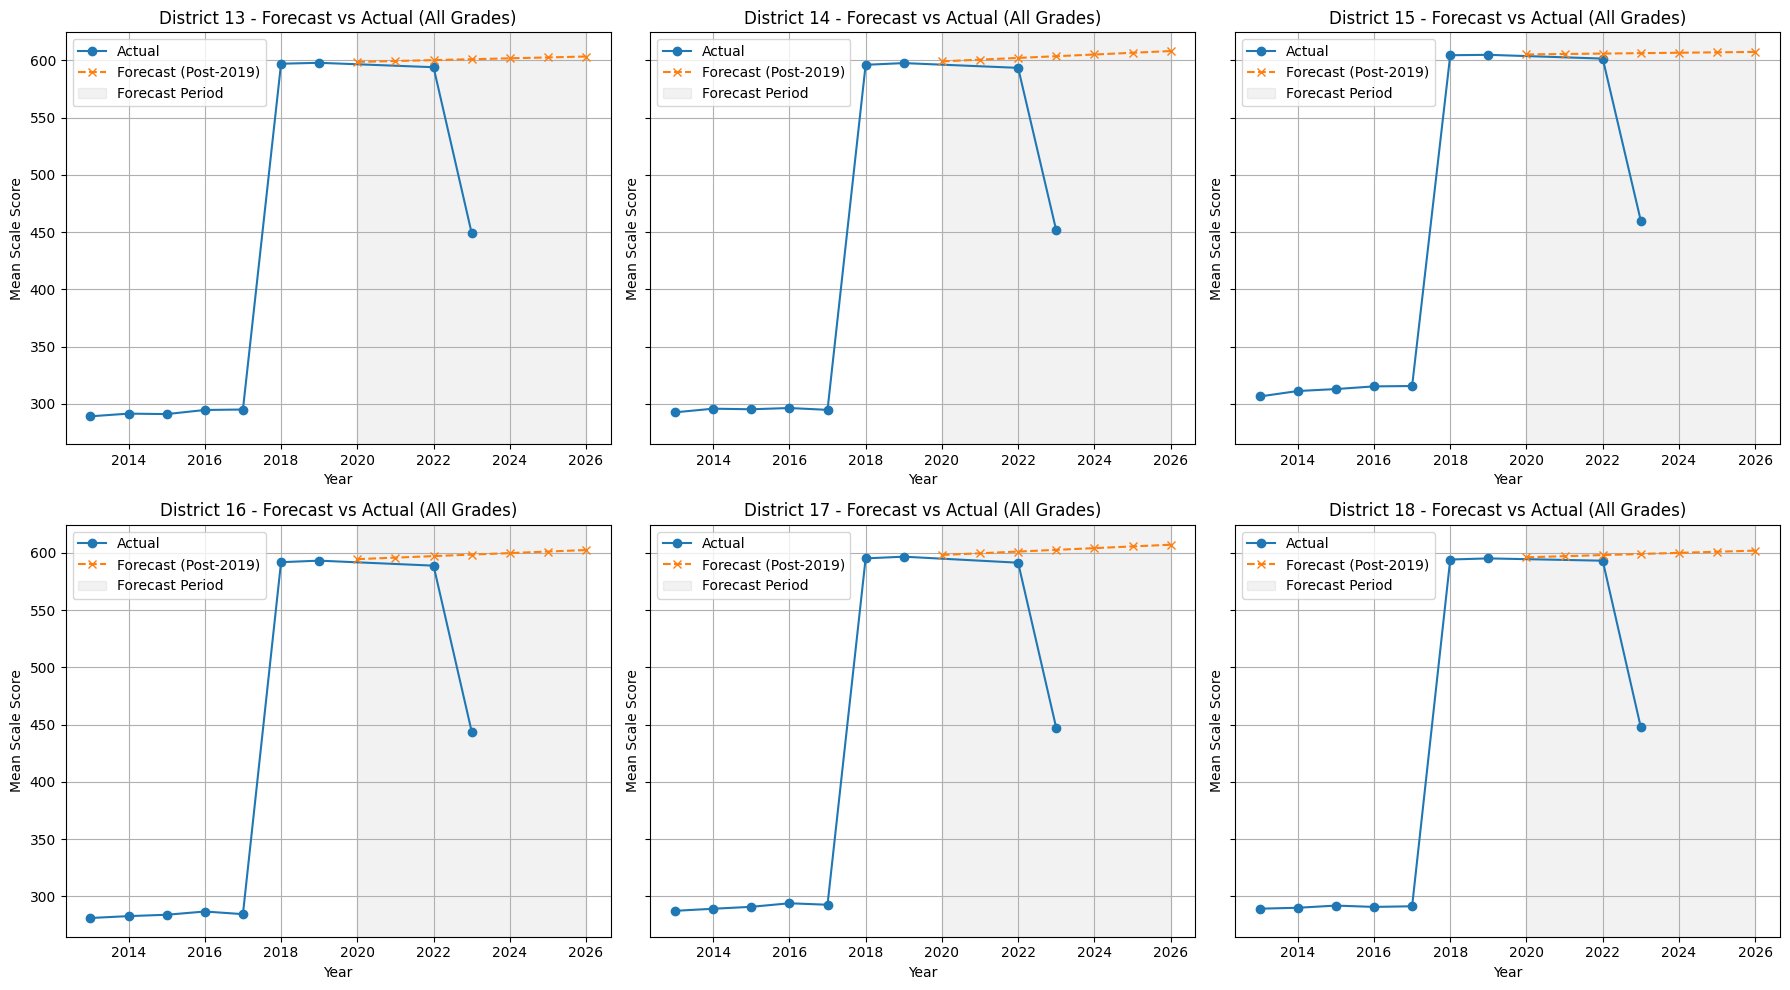

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for i, district in enumerate(sorted(forecast_allgrades.keys())[12:18]):
    actual = math_all_ts_df[math_all_ts_df["District"] == district]
    forecast_data = forecast_allgrades[district]

    ax = axes[i]
    ax.plot(actual["Year"], actual["Mean Scale Score"], label="Actual", marker='o')
    ax.plot(forecast_data["years"], forecast_data["forecast"], label="Forecast (Post-2019)", linestyle="--", marker='x')
    ax.axvspan(2020, 2026, color='gray', alpha=0.1, label="Forecast Period")
    ax.set_title(f"District {district} - Forecast vs Actual (All Grades)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Mean Scale Score")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

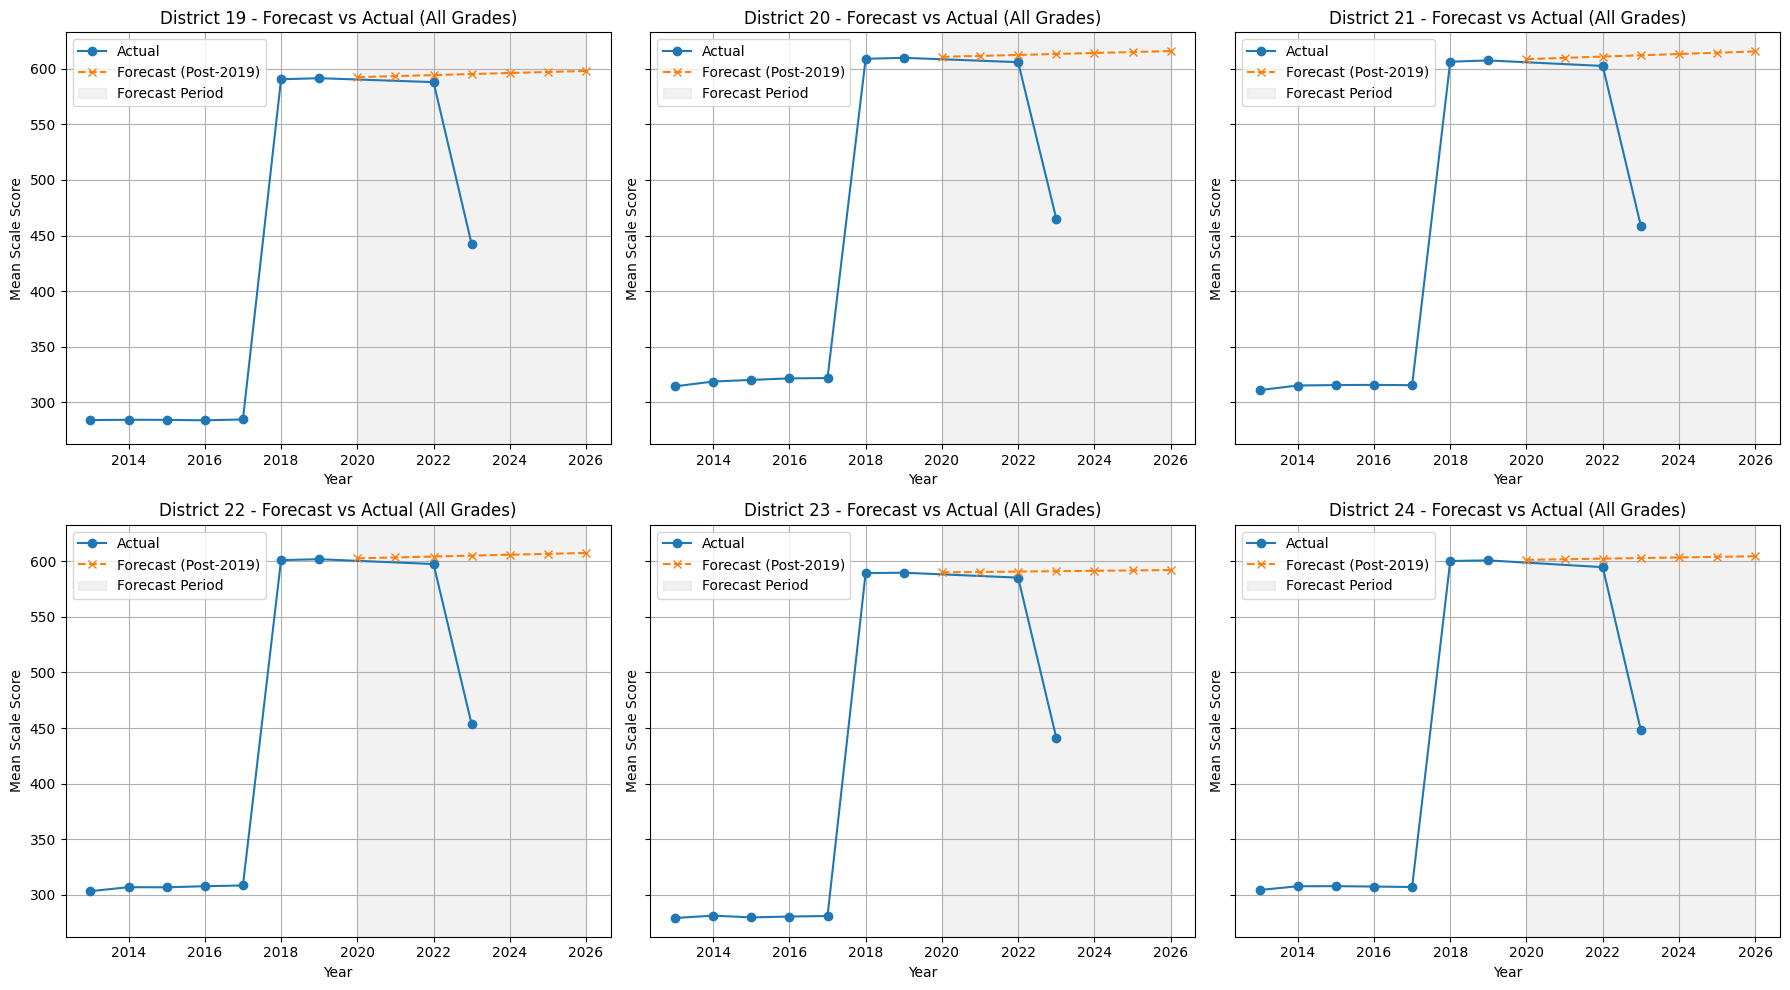

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for i, district in enumerate(sorted(forecast_allgrades.keys())[18:24]):
    actual = math_all_ts_df[math_all_ts_df["District"] == district]
    forecast_data = forecast_allgrades[district]

    ax = axes[i]
    ax.plot(actual["Year"], actual["Mean Scale Score"], label="Actual", marker='o')
    ax.plot(forecast_data["years"], forecast_data["forecast"], label="Forecast (Post-2019)", linestyle="--", marker='x')
    ax.axvspan(2020, 2026, color='gray', alpha=0.1, label="Forecast Period")
    ax.set_title(f"District {district} - Forecast vs Actual (All Grades)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Mean Scale Score")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

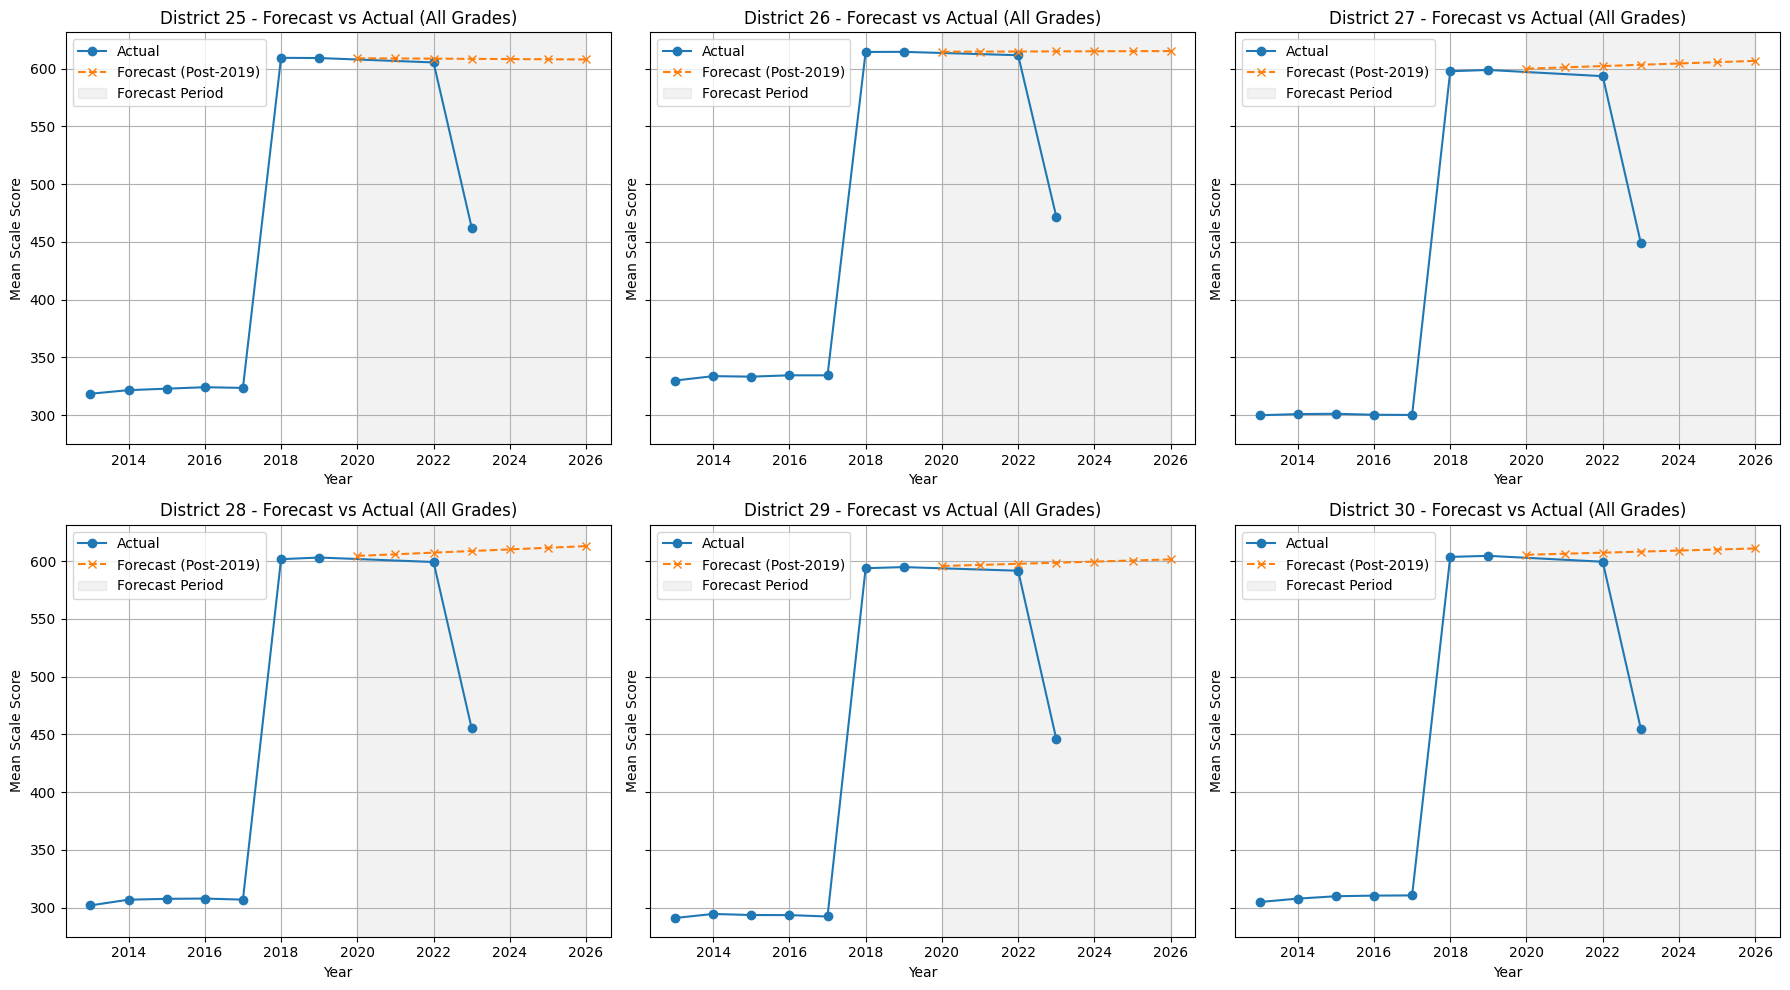

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for i, district in enumerate(sorted(forecast_allgrades.keys())[24:30]):
    actual = math_all_ts_df[math_all_ts_df["District"] == district]
    forecast_data = forecast_allgrades[district]

    ax = axes[i]
    ax.plot(actual["Year"], actual["Mean Scale Score"], label="Actual", marker='o')
    ax.plot(forecast_data["years"], forecast_data["forecast"], label="Forecast (Post-2019)", linestyle="--", marker='x')
    ax.axvspan(2020, 2026, color='gray', alpha=0.1, label="Forecast Period")
    ax.set_title(f"District {district} - Forecast vs Actual (All Grades)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Mean Scale Score")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

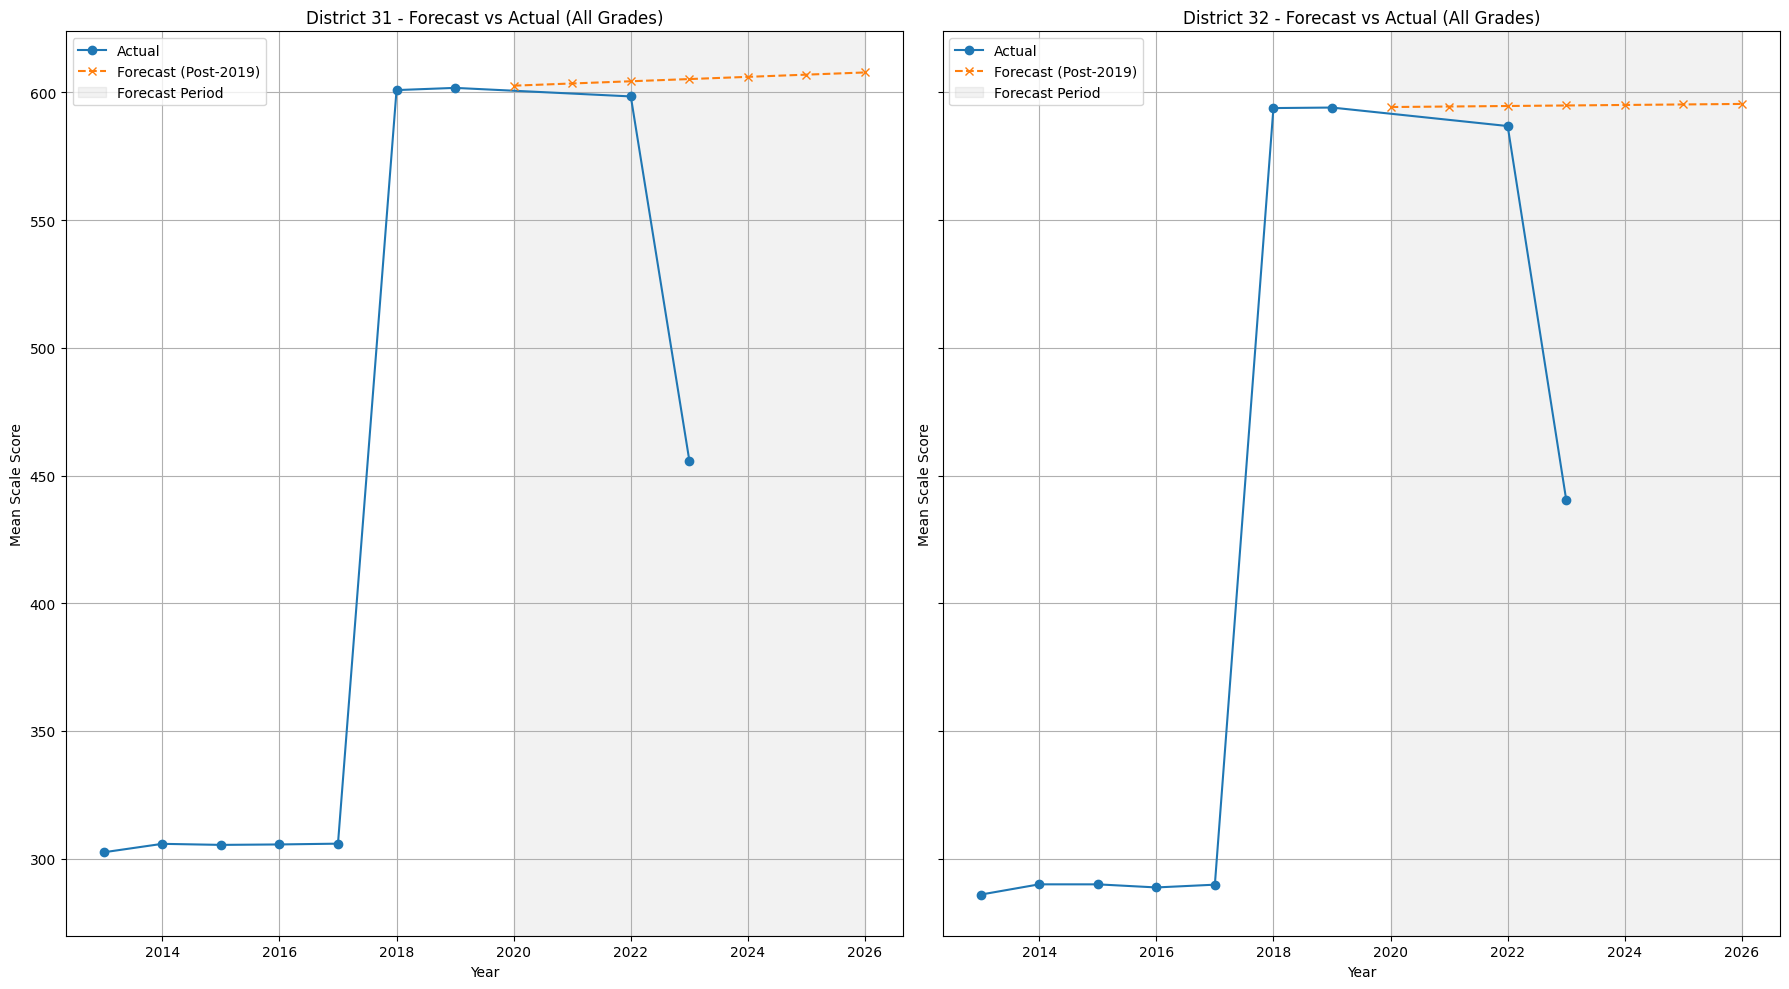

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for i, district in enumerate(sorted(forecast_allgrades.keys())[30:]):
    actual = math_all_ts_df[math_all_ts_df["District"] == district]
    forecast_data = forecast_allgrades[district]

    ax = axes[i]
    ax.plot(actual["Year"], actual["Mean Scale Score"], label="Actual", marker='o')
    ax.plot(forecast_data["years"], forecast_data["forecast"], label="Forecast (Post-2019)", linestyle="--", marker='x')
    ax.axvspan(2020, 2026, color='gray', alpha=0.1, label="Forecast Period")
    ax.set_title(f"District {district} - Forecast vs Actual (All Grades)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Mean Scale Score")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
comparison_results = []

for district in sorted(forecast_allgrades.keys()):
    forecast_2023 = forecast_allgrades[district]["forecast"][-1]
    actual_row = math_all_ts_df[(math_all_ts_df["District"] == district) & (math_all_ts_df["Year"] == 2023)]

    if not actual_row.empty:
        actual_2023 = actual_row["Mean Scale Score"].values[0]
        difference = actual_2023 - forecast_2023
        comparison_results.append({
            "District": district,
            "Forecast 2023": forecast_2023,
            "Actual 2023": actual_2023,
            "Absolute Difference": abs(difference)
        })

comparison_df = pd.DataFrame(comparison_results)
comparison_df = comparison_df.sort_values(by="Absolute Difference", ascending=False)

In [ ]:
comparison_df

,District,Forecast 2023,Actual 2023,Absolute Difference
0,1,629.919390,456.371552,173.547838
7,8,609.773595,442.061951,167.711644
11,12,605.238024,437.778717,167.459307
5,6,611.442969,445.933319,165.509650
3,4,606.437106,444.609772,161.827335
9,10,601.259469,440.160797,161.098672
8,9,599.010337,438.979126,160.031211
16,17,607.138481,447.113800,160.024681
4,5,596.865351,438.035278,158.830073
6,7,597.039613,438.493256,158.546358


# Regression

In [ ]:
district_yearly_avg = df.groupby(["District", "Year"])["Mean Scale Score"].mean().reset_index()
district_yearly_avg = district_yearly_avg[district_yearly_avg["Year"].between(2018, 2023)]
district_yearly_avg

,District,Year,Mean Scale Score
5,1,2018,600.315643
6,1,2019,604.034556
7,1,2022,600.986633
8,1,2023,455.349747
14,2,2018,613.222280
...,...,...,...
278,31,2023,455.647242
284,32,2018,593.913066
285,32,2019,593.955953
286,32,2022,586.788330


In [ ]:
district_regression_results = []

In [ ]:
for district in district_yearly_avg["District"].unique():
    df_district = district_yearly_avg[district_yearly_avg["District"] == district]
    model = ols("Q('Mean Scale Score') ~ Year", data=df_district).fit()

    district_regression_results.append({
        "District": district,
        "R-squared": model.rsquared,
        "Coef (Year)": model.params["Year"],
        "P-value": model.pvalues["Year"]
    })

district_regression_df = pd.DataFrame(district_regression_results)


In [ ]:
#Showing significant districts only
significant = district_regression_df[district_regression_df["P-value"] < 0.05]
significant

,District,R-squared,Coef (Year),P-value


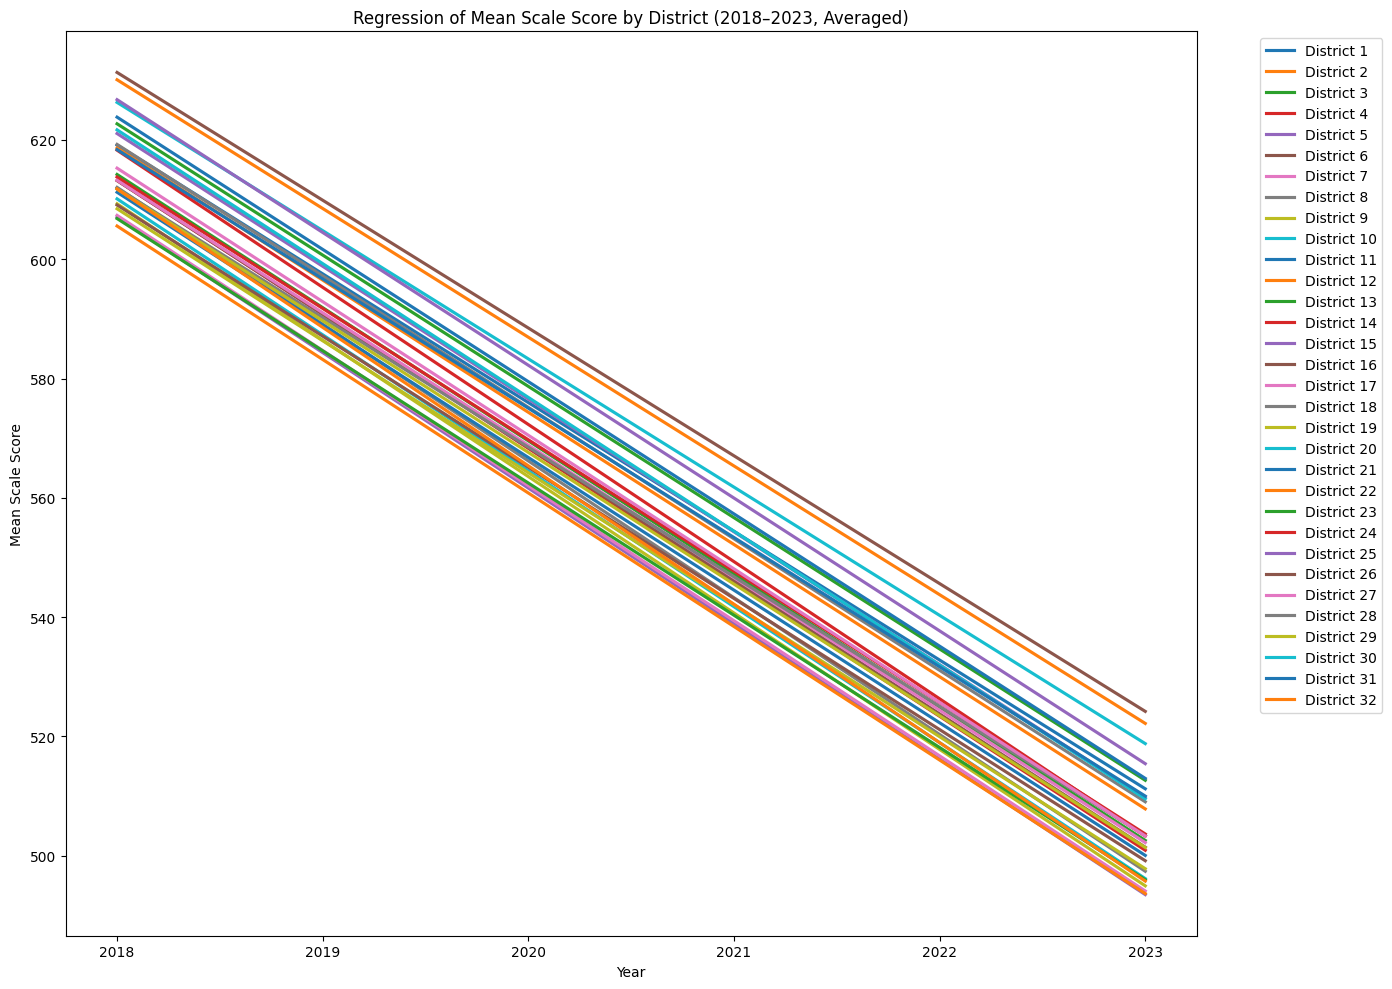

In [ ]:
plt.figure(figsize=(14, 10))

for district in district_yearly_avg["District"].unique():
    df_district = district_yearly_avg[district_yearly_avg["District"] == district]
    sns.regplot(data=df_district, x="Year", y="Mean Scale Score", ci=None, label=f"District {district}", scatter=False)

plt.title("Regression of Mean Scale Score by District (2018–2023, Averaged)")
plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


,District,Year,Mean Scale Score


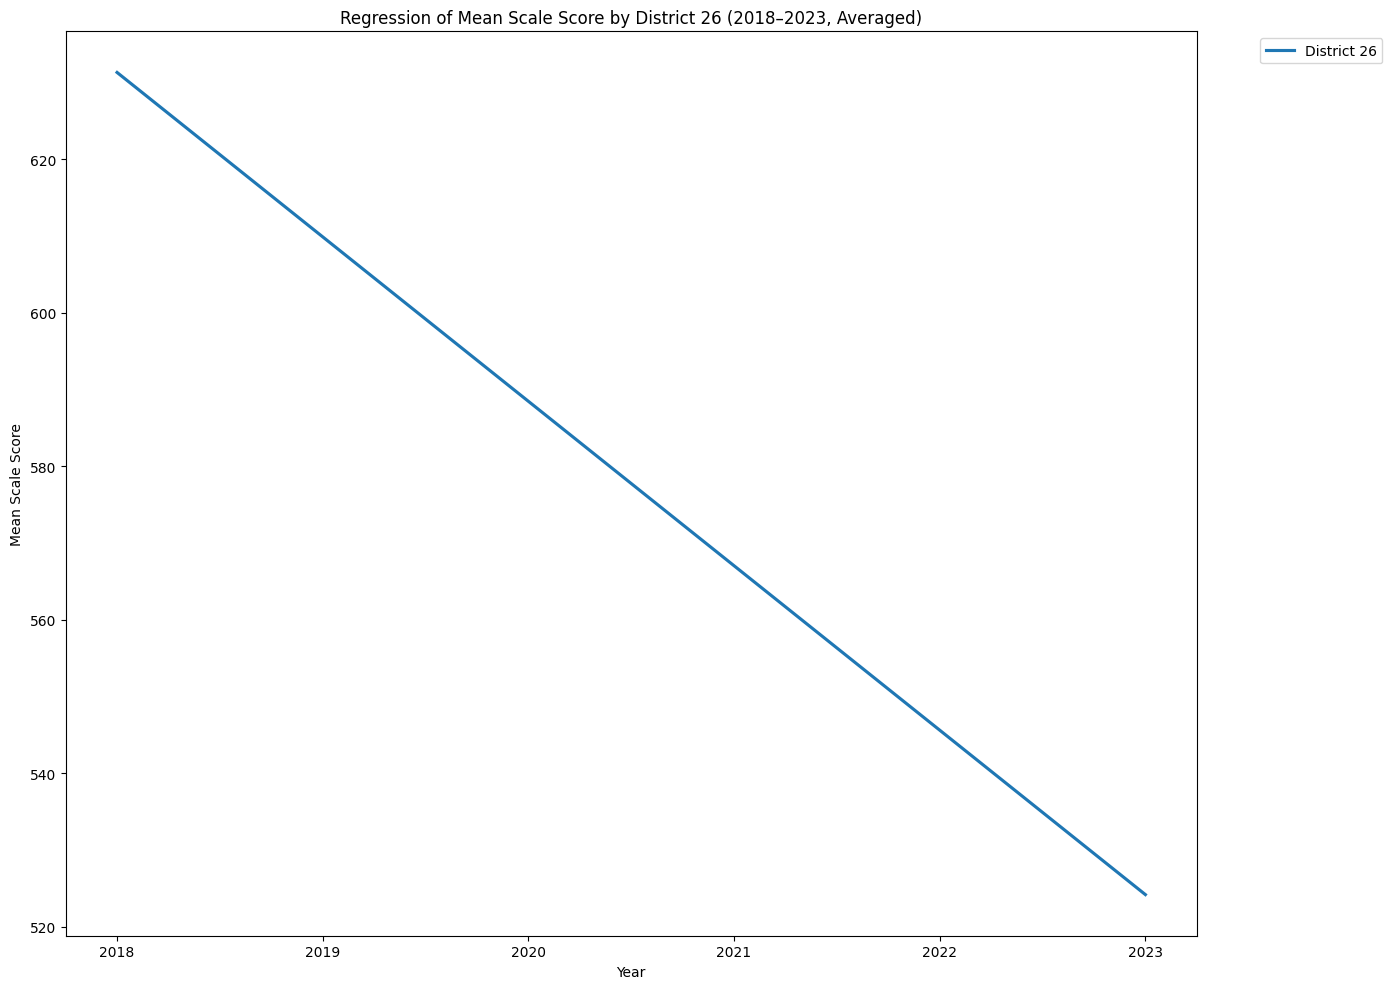

In [ ]:
plt.figure(figsize=(14, 10))


df_district = district_yearly_avg[district_yearly_avg["District"] == 26]
sns.regplot(data=df_district, x="Year", y="Mean Scale Score", ci=None, label=f"District 26", scatter=False)

plt.title("Regression of Mean Scale Score by District 26 (2018–2023, Averaged)")
plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(14, 10))


df_district = district_yearly_avg[district_yearly_avg["District"] == 1]
sns.regplot(data=df_district, x="Year", y="Mean Scale Score", ci=None, label=f"District {district}", scatter=False)

plt.title("Regression of Mean Scale Score by District 26 (2018–2023, Averaged)")
plt.xlabel("Year")
plt.ylabel("Mean Scale Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:

district_regression_results = []


for district in district_yearly_avg["District"].unique():
    df_district = district_yearly_avg[district_yearly_avg["District"] == district]
    model = ols("Q('Mean Scale Score') ~ Year", data=df_district).fit()

    district_regression_results.append({
        "District": district,
        "R-squared": model.rsquared,
        "Coef (Year)": model.params["Year"],
        "P-value": model.pvalues["Year"]
    })

district_regression_df = pd.DataFrame(district_regression_results)


significant = district_regression_df[district_regression_df["P-value"] < 0.05]
significant

,District,R-squared,Coef (Year),P-value
0,1,0.504175,29.688766,0.032096
1,2,0.503044,28.510484,0.032377
2,3,0.501736,29.220847,0.032706
3,4,0.501203,30.182305,0.032840
4,5,0.503339,30.906232,0.032304
5,6,0.508188,30.706047,0.031111
6,7,0.508254,31.149871,0.031095
7,8,0.501490,30.532134,0.032768
8,9,0.503932,30.893598,0.032156
9,10,0.498360,30.180015,0.033565


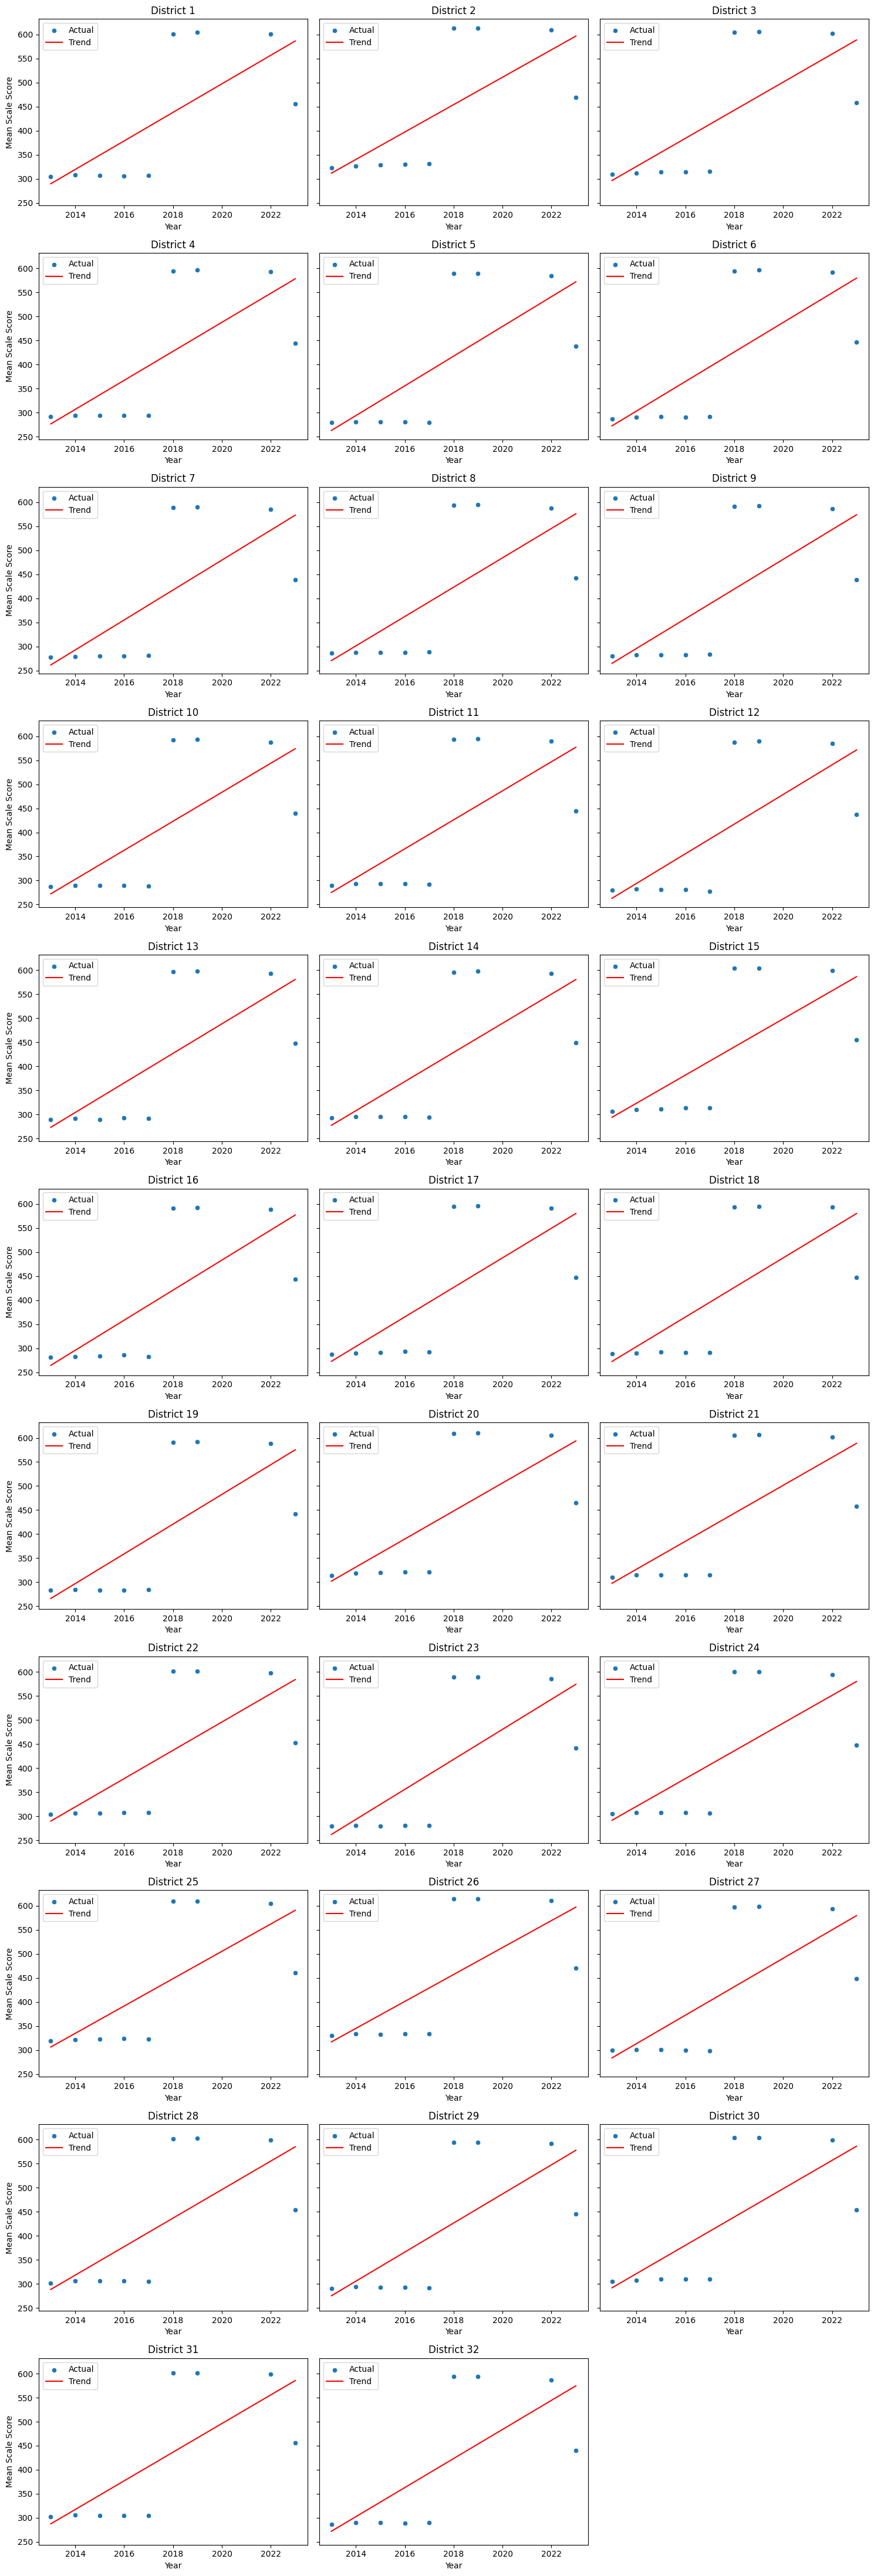

In [ ]:
unique_districts = district_yearly_avg["District"].unique()
num_districts = len(unique_districts)
num_cols = 3
num_rows = (num_districts + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4), sharey=True)
axes = axes.flatten()

for i, district in enumerate(unique_districts):
    ax = axes[i]
    df_district = district_yearly_avg[district_yearly_avg["District"] == district]

    sns.scatterplot(data=df_district, x="Year", y="Mean Scale Score", ax=ax, label='Actual')

    model = ols("Q('Mean Scale Score') ~ Year", data=df_district).fit()
    years = pd.Series(sorted(df_district["Year"].unique()))
    predicted_scores = model.params["Intercept"] + model.params["Year"] * years
    ax.plot(years, predicted_scores, color='red', label='Trend')

    ax.set_title(f"District {district}")
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()